# Prepare Dataset for Model Training and Evaluating

# Cell Data set

https://s3.amazonaws.com/cell_data/



# Checking Pre-Requisites from the Previous `01_setup/` Folder

In [368]:
%store -r setup_instance_check_passed

In [369]:
try:
    setup_instance_check_passed
except NameError:
    print("+++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Instance Check.")
    print("+++++++++++++++++++++++++++++++")

In [370]:
print(setup_instance_check_passed)

True


In [371]:
%store -r setup_dependencies_passed

In [372]:
try:
    setup_dependencies_passed
except NameError:
    print("+++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup Dependencies.")
    print("+++++++++++++++++++++++++++++++")

In [373]:
print(setup_dependencies_passed)

True


In [374]:
%store -r setup_s3_bucket_passed

In [375]:
try:
    setup_s3_bucket_passed
except NameError:
    print("+++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup S3 Bucket.")
    print("+++++++++++++++++++++++++++++++")

In [376]:
print(setup_s3_bucket_passed)

True


In [377]:
%store -r setup_iam_roles_passed

In [378]:
try:
    setup_iam_roles_passed
except NameError:
    print("+++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup IAM Roles.")
    print("+++++++++++++++++++++++++++++++")

In [379]:
print(setup_iam_roles_passed)

True


## Check if requirements passed

In [380]:
if not setup_instance_check_passed:
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Instance Check.")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
if not setup_dependencies_passed:
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup Dependencies.")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
if not setup_s3_bucket_passed:
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup S3 Bucket.")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
if not setup_iam_roles_passed:
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup IAM Roles.")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

In [381]:
import boto3
import sagemaker
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

sess = sagemaker.Session()
bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = boto3.Session().region_name

sm = boto3.Session().client(service_name="sagemaker", region_name=region)

## Download

Let's start by retrieving a subset of the Amazon Customer Reviews dataset.

In [382]:
!aws s3 cp 's3://sagemaker-us-east-1-614093401978/cell_data/OHSU_BeatAMLWaves1_2_Tyner_ClinicalSummary.csv' ./data/

download: s3://sagemaker-us-east-1-614093401978/cell_data/OHSU_BeatAMLWaves1_2_Tyner_ClinicalSummary.csv to data/OHSU_BeatAMLWaves1_2_Tyner_ClinicalSummary.csv


In [383]:
import csv

df = pd.read_csv(
    's3://sagemaker-us-east-1-614093401978/cell_data/OHSU_BeatAMLWaves1_2_Tyner_ClinicalSummary.csv')
df.shape

(672, 159)

In [384]:
df.head(5)

,LabId,PatientId,consensus_sex,inferred_sex,inferred_ethnicity,centerID,CEBPA_Biallelic,ageAtDiagnosis,isRelapse,isDenovo,...,STAG2,STAT3,SUZ12,TCL1A,TET2,TP53,TYK2,U2AF1,WT1,ZRSR2
0,09-00705,163,Male,Male,White,1,n,73.0,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10-00136,174,Male,Male,White,1,n,69.0,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10-00172,175,Female,Male,White,1,n,59.0,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10-00507,45,Female,Female,White,1,n,70.0,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10-00542,174,Male,Male,White,1,n,69.0,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [385]:
!aws s3 cp 's3://sagemaker-us-east-1-614093401978/cell_data/OHSU_BeatAMLWaves1_2_Tyner_DrugResponse.csv' ./data/

download: s3://sagemaker-us-east-1-614093401978/cell_data/OHSU_BeatAMLWaves1_2_Tyner_DrugResponse.csv to data/OHSU_BeatAMLWaves1_2_Tyner_DrugResponse.csv


In [386]:
df1 = pd.read_csv(
    's3://sagemaker-us-east-1-614093401978/cell_data/OHSU_BeatAMLWaves1_2_Tyner_DrugResponse.csv')
df1.shape

(47650, 4)

In [387]:
df1.head(5)

,inhibitor,lab_id,ic50,auc
0,17-AAG (Tanespimycin),12-00211,10.000000,225.918025
1,17-AAG (Tanespimycin),12-00219,0.276661,135.264409
2,17-AAG (Tanespimycin),12-00258,2.722845,164.561227
3,17-AAG (Tanespimycin),12-00262,0.123136,111.555971
4,17-AAG (Tanespimycin),12-00268,10.000000,226.805281


In [388]:
clsm = df.replace('', np.NAN)
clsm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Columns: 159 entries, LabId to ZRSR2
dtypes: bool(9), float64(22), int64(7), object(121)
memory usage: 793.5+ KB


In [389]:
clsm.info(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 159 columns):
 #    Column                                         Dtype  
---   ------                                         -----  
 0    LabId                                          object 
 1    PatientId                                      int64  
 2    consensus_sex                                  object 
 3    inferred_sex                                   object 
 4    inferred_ethnicity                             object 
 5    centerID                                       int64  
 6    CEBPA_Biallelic                                object 
 7    ageAtDiagnosis                                 float64
 8    isRelapse                                      bool   
 9    isDenovo                                       bool   
 10   isTransformed                                  bool   
 11   finalFusion                                    object 
 12   specificDxAtAcquisition_MDSMPN    

In [390]:
!pip install klib



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip


In [391]:
import numpy as np
import seaborn as sns
import klib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

GridSpec(6, 6)

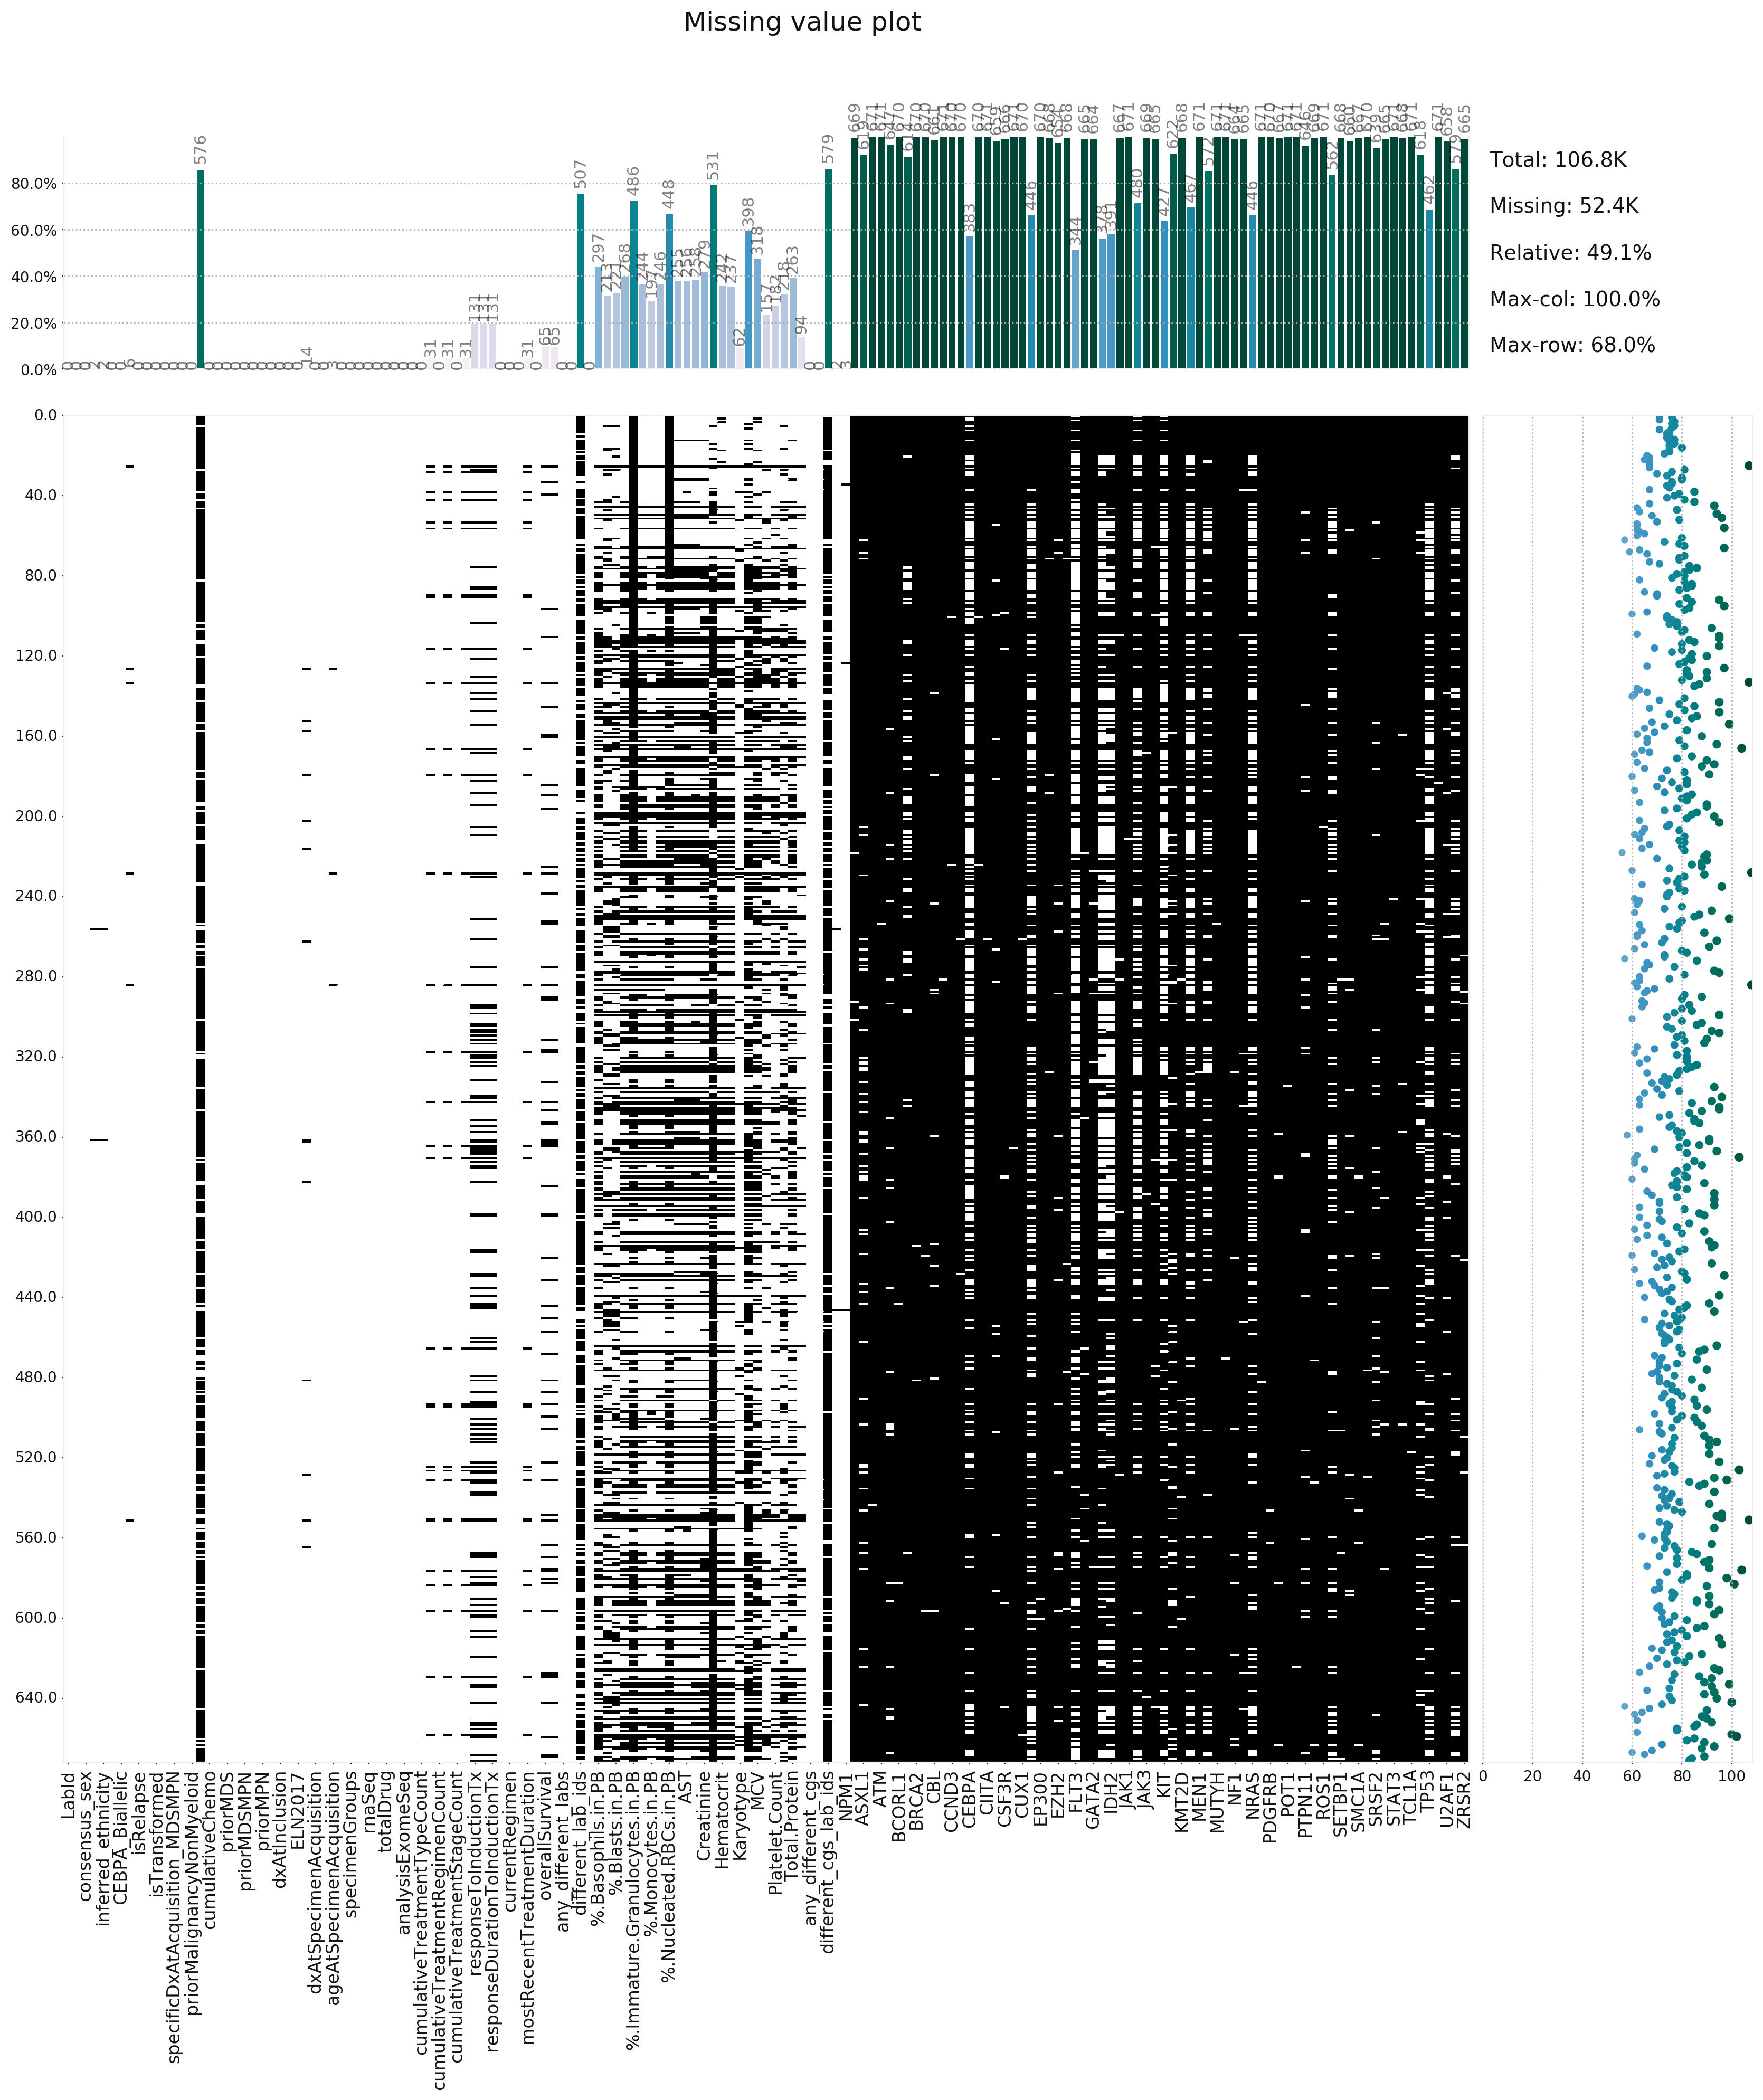

In [392]:
klib.missingval_plot(clsm)

# Select Relevant Features

In [393]:
clsm.columns = map(str.lower, clsm.columns)

In [394]:
clsm_cut = pd.DataFrame(clsm[['labid', 'patientid', 'consensus_sex', 'inferred_ethnicity', 'isrelapse',
                             'istransformed', 'priormalignancynonmyeloid', 'priormds', 'priormdsmpn', 'priormpn',
                             'eln2017', 'dxatspecimenacquisition', 'vitalstatus', 'overallsurvival', '%.blasts.in.bm', 
                              '%.blasts.in.pb','flt3-itd', 'npm1']])

clsm_cut.head(5)

,labid,patientid,consensus_sex,inferred_ethnicity,isrelapse,istransformed,priormalignancynonmyeloid,priormds,priormdsmpn,priormpn,eln2017,dxatspecimenacquisition,vitalstatus,overallsurvival,%.blasts.in.bm,%.blasts.in.pb,flt3-itd,npm1
0,09-00705,163,Male,White,False,False,n,n,n,n,FavorableOrIntermediate,ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...,Dead,425.0,94,97,positive,positive
1,10-00136,174,Male,White,False,False,n,n,n,n,Adverse,ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...,Dead,419.0,80,19,positive,negative
2,10-00172,175,Female,White,False,False,n,n,n,n,IntermediateOrAdverse,ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...,Dead,541.0,91,99,positive,negative
3,10-00507,45,Female,White,False,False,n,n,n,n,FavorableOrIntermediate,ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...,Dead,511.0,97,97,positive,positive
4,10-00542,174,Male,White,True,False,n,n,n,n,Adverse,ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...,Dead,419.0,87,80,positive,negative


In [395]:
clsm_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   labid                      672 non-null    object 
 1   patientid                  672 non-null    int64  
 2   consensus_sex              672 non-null    object 
 3   inferred_ethnicity         670 non-null    object 
 4   isrelapse                  672 non-null    bool   
 5   istransformed              672 non-null    bool   
 6   priormalignancynonmyeloid  672 non-null    object 
 7   priormds                   672 non-null    object 
 8   priormdsmpn                672 non-null    object 
 9   priormpn                   672 non-null    object 
 10  eln2017                    672 non-null    object 
 11  dxatspecimenacquisition    672 non-null    object 
 12  vitalstatus                672 non-null    object 
 13  overallsurvival            607 non-null    float64

In [396]:
clsm_cut.describe()

,patientid,overallsurvival
count,672.000000,607.000000
mean,2088.020833,441.881384
std,973.372734,479.180429
min,17.000000,-1.000000
25%,1450.750000,167.000000
50%,2016.000000,323.000000
75%,2501.500000,555.000000
max,4380.000000,5305.000000


# Attribute Information
## % Blasts Attributes Numerical Prep
### %.blasts.in.bm Attribute: 

In [397]:
clsm_cut['%.blasts.in.bm'].unique()

array(['94', '80', '91', '97', '87', nan, '40', '75', '83', '95', '85',
       '90', '70', '92', '72', '68', '88', '36', '81', '93', '34', '77.5',
       '46', '65', '50', '76', '71', '60', '73', '55', '0.5', '30', '62',
       '18', '82', '28', '41', '64', '84', '21', '51', '17', '49.4', '32',
       '29', '25', '59.3', '66', '20', '52', '54', '22', '10', '12', '13',
       '67', '39', '25.9', '45', '37', '78', '8', '3', '54.8', '74', '96',
       '4', '86.1', '42', '56', '69', '79', '33', '9', '0.4', '51.5',
       '15', '5', '24', '7', '2', '6', '1', '58', '>50', '35', '86',
       '93.2', '0', '27', '89.6', '23', '98', '19', '91.8', '>95', '57',
       '71.5', '78.3', '63', '1.5', '53.74', '59.5', '44', '42.5', '26',
       '3.5', '48', '26.3', '47', '88.5'], dtype=object)

In [398]:
# > and < will be changed to whole numbers less than or greater than.
clsm_cut['%.blasts.in.bm'] = clsm_cut['%.blasts.in.bm'].replace(['>50'], 51)
clsm_cut['%.blasts.in.bm'] = clsm_cut['%.blasts.in.bm'].replace(['>95'], 96)

clsm_cut['%.blasts.in.bm'].unique()

array(['94', '80', '91', '97', '87', nan, '40', '75', '83', '95', '85',
       '90', '70', '92', '72', '68', '88', '36', '81', '93', '34', '77.5',
       '46', '65', '50', '76', '71', '60', '73', '55', '0.5', '30', '62',
       '18', '82', '28', '41', '64', '84', '21', '51', '17', '49.4', '32',
       '29', '25', '59.3', '66', '20', '52', '54', '22', '10', '12', '13',
       '67', '39', '25.9', '45', '37', '78', '8', '3', '54.8', '74', '96',
       '4', '86.1', '42', '56', '69', '79', '33', '9', '0.4', '51.5',
       '15', '5', '24', '7', '2', '6', '1', '58', 51, '35', '86', '93.2',
       '0', '27', '89.6', '23', '98', '19', '91.8', 96, '57', '71.5',
       '78.3', '63', '1.5', '53.74', '59.5', '44', '42.5', '26', '3.5',
       '48', '26.3', '47', '88.5'], dtype=object)

### %.blasts.in.pb Attribute:

In [399]:
clsm_cut['%.blasts.in.pb'].unique()

array(['97', '19', '99', '80', nan, '51', '30', '41', '84', '77', '75',
       '63', '60', '96', '66', '45', '93', '9', '82', '15', '33', '0',
       '13', '94', '89', '83', '>90', '78', '72', '59', '32', '6', '29',
       '24', '64', '57', '52', '2.1', '<5', '17', '22', '5', '47', '56',
       '25', '23', '42', '65', '71', '8', '3.5', '66.3', '95', '44', '10',
       '28.6', '18', '58', '67', '40', '92', '54', '1', '2', '20', '28',
       '35', '85', '42.4', '16', '49.1', '14', '88', '46', '7', '0.5',
       '79', '26', '87', '20.4', '68', '48', '5.3', '61', '90', '17.4',
       '57.4', '43.8', '50', '37', '4', '3', '12', '81', '11', '90.5',
       '"rare"', '90.2', '55', 'rare', '39', '31', '86', '47.4', '27.4',
       '39.6', '12.9', '15.4', '9.5', '62', '64.6', '27.8', '69.14',
       '52.2', '91', '67.25', '49', '23.7', '48.6', '98', '74.8', '2.6',
       '43', '29.6', '47.5', '38', '2.5', '25.2', '3.56', '70', '99.2',
       '73', '26.7', '38.5', '7.7', '74', '93.3', '12.1', '11.

In [400]:
#%.Blasts.in.PB attribute has 1 "rare" record with no flt3 nor npm1 input. This will be changed to NAN
clsm_cut['%.blasts.in.pb'] = clsm_cut['%.blasts.in.pb'].replace(['"""rare"""'], np.nan)
clsm_cut['%.blasts.in.pb'] = clsm_cut['%.blasts.in.pb'].replace(['"rare"'], np.nan)
clsm_cut['%.blasts.in.pb'] = clsm_cut['%.blasts.in.pb'].replace(['rare'], np.nan)
# > and < will be changed to whole numbers less than or greater than. 
clsm_cut['%.blasts.in.pb'] = clsm_cut['%.blasts.in.pb'].replace(['<5'], 4)
clsm_cut['%.blasts.in.pb'] = clsm_cut['%.blasts.in.pb'].replace(['>90'], 91)

clsm_cut['%.blasts.in.pb'].unique()

array(['97', '19', '99', '80', nan, '51', '30', '41', '84', '77', '75',
       '63', '60', '96', '66', '45', '93', '9', '82', '15', '33', '0',
       '13', '94', '89', '83', 91, '78', '72', '59', '32', '6', '29',
       '24', '64', '57', '52', '2.1', 4, '17', '22', '5', '47', '56',
       '25', '23', '42', '65', '71', '8', '3.5', '66.3', '95', '44', '10',
       '28.6', '18', '58', '67', '40', '92', '54', '1', '2', '20', '28',
       '35', '85', '42.4', '16', '49.1', '14', '88', '46', '7', '0.5',
       '79', '26', '87', '20.4', '68', '48', '5.3', '61', '90', '17.4',
       '57.4', '43.8', '50', '37', '4', '3', '12', '81', '11', '90.5',
       '90.2', '55', '39', '31', '86', '47.4', '27.4', '39.6', '12.9',
       '15.4', '9.5', '62', '64.6', '27.8', '69.14', '52.2', '91',
       '67.25', '49', '23.7', '48.6', '98', '74.8', '2.6', '43', '29.6',
       '47.5', '38', '2.5', '25.2', '3.56', '70', '99.2', '73', '26.7',
       '38.5', '7.7', '74', '93.3', '12.1', '11.2', '92.9', '98.4', '6.8

###  From Categorical to Numerical

#### Transform %.blasts.in.bm and %.blasts.in.pb from object to float:


In [401]:
clsm_cut['%.blasts.in.bm'] = clsm_cut['%.blasts.in.bm'].astype(float)
clsm_cut['%.blasts.in.pb'] = clsm_cut['%.blasts.in.pb'].astype(float)


clsm_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   labid                      672 non-null    object 
 1   patientid                  672 non-null    int64  
 2   consensus_sex              672 non-null    object 
 3   inferred_ethnicity         670 non-null    object 
 4   isrelapse                  672 non-null    bool   
 5   istransformed              672 non-null    bool   
 6   priormalignancynonmyeloid  672 non-null    object 
 7   priormds                   672 non-null    object 
 8   priormdsmpn                672 non-null    object 
 9   priormpn                   672 non-null    object 
 10  eln2017                    672 non-null    object 
 11  dxatspecimenacquisition    672 non-null    object 
 12  vitalstatus                672 non-null    object 
 13  overallsurvival            607 non-null    float64

## clsm_cut Identify Missing Values

GridSpec(6, 6)

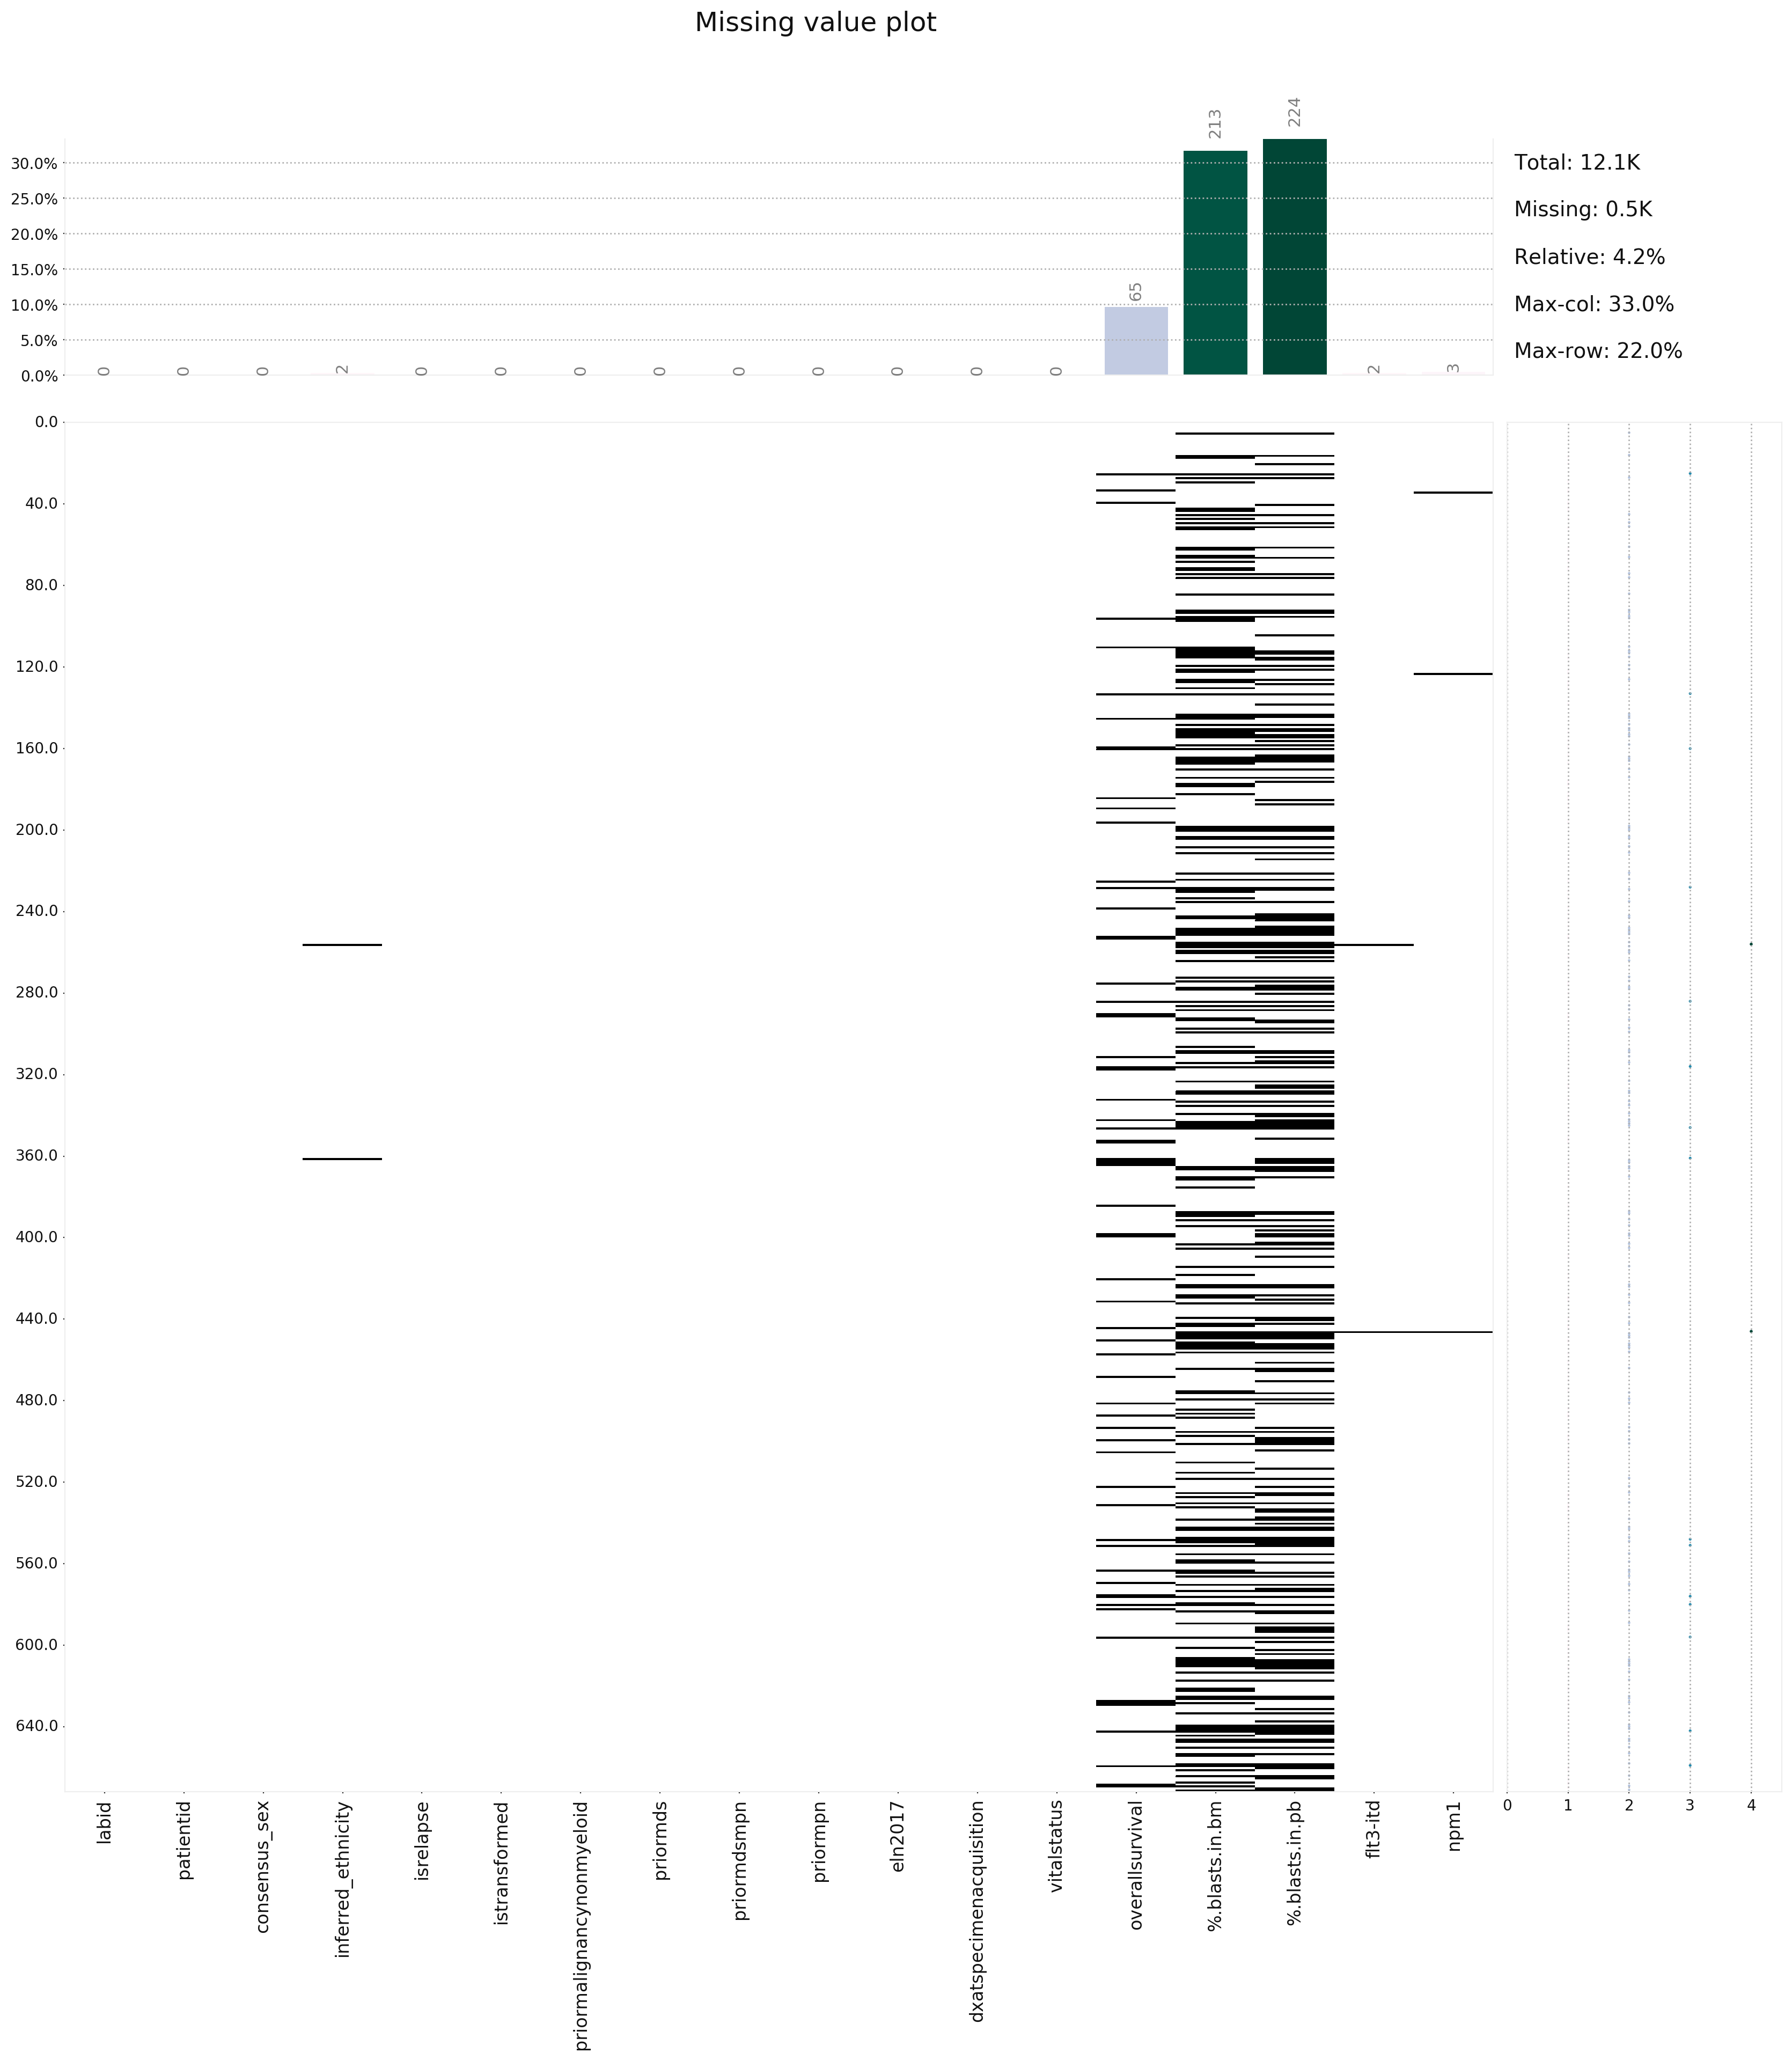

In [402]:
klib.missingval_plot(clsm_cut)

## Replace Missing Values

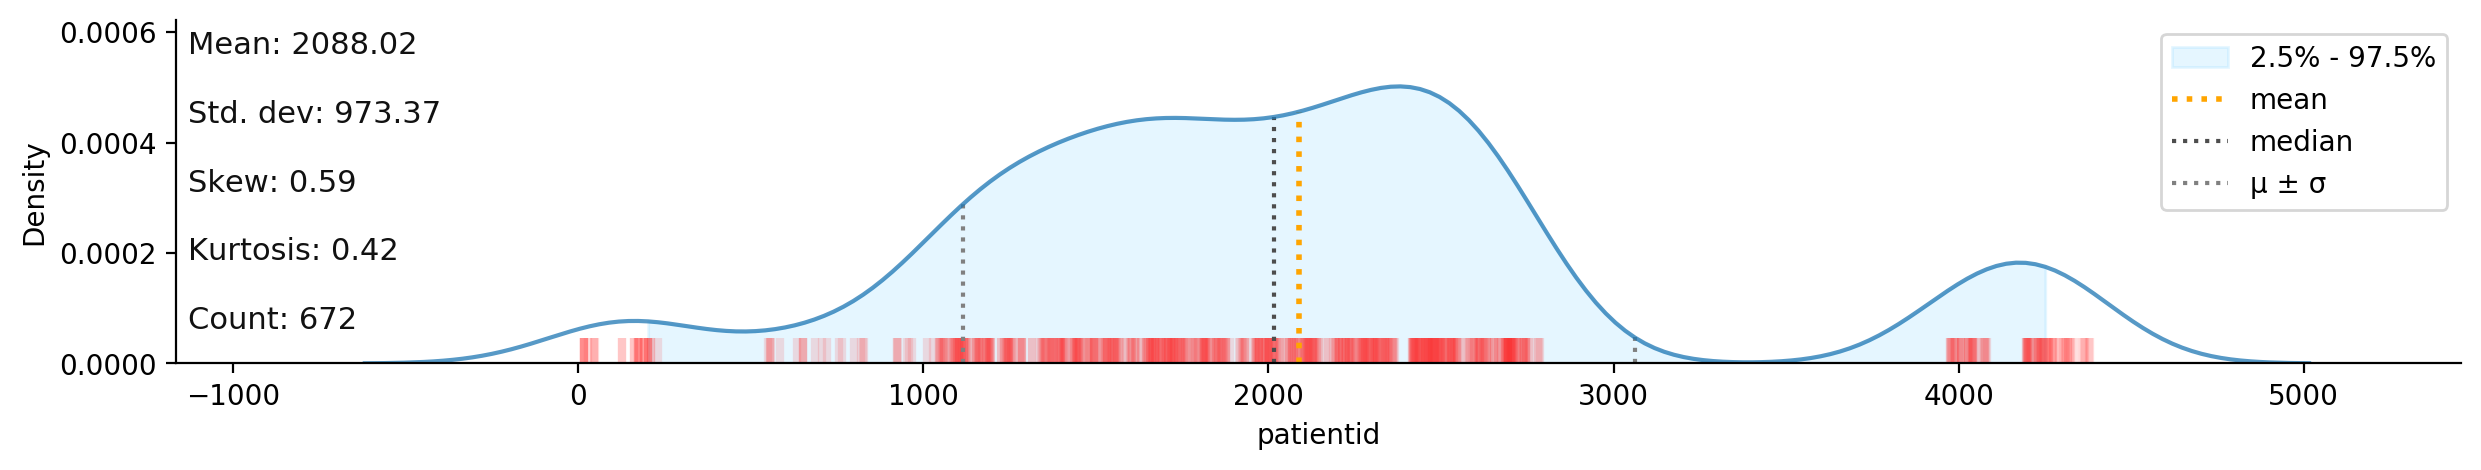

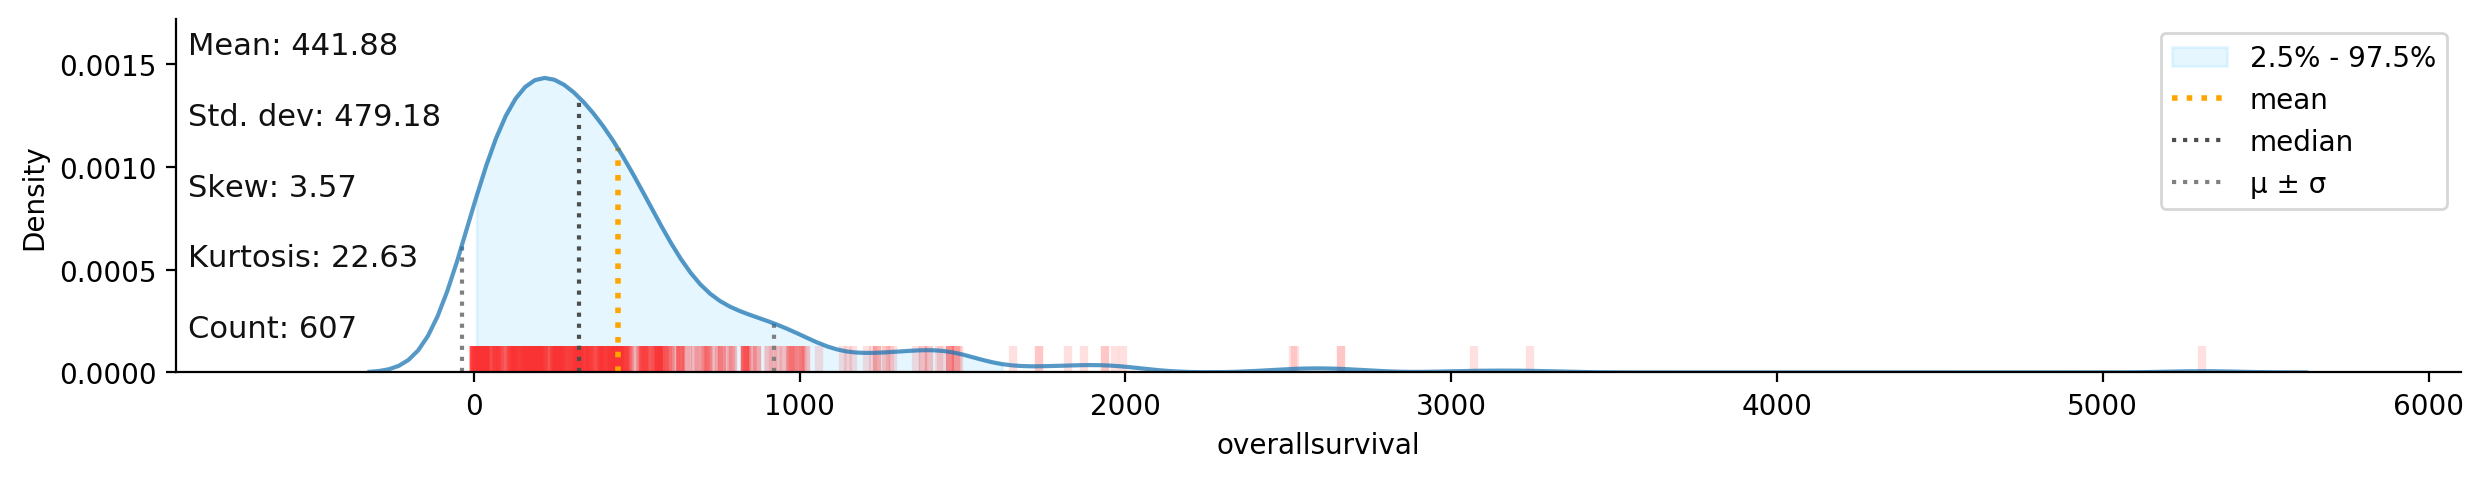

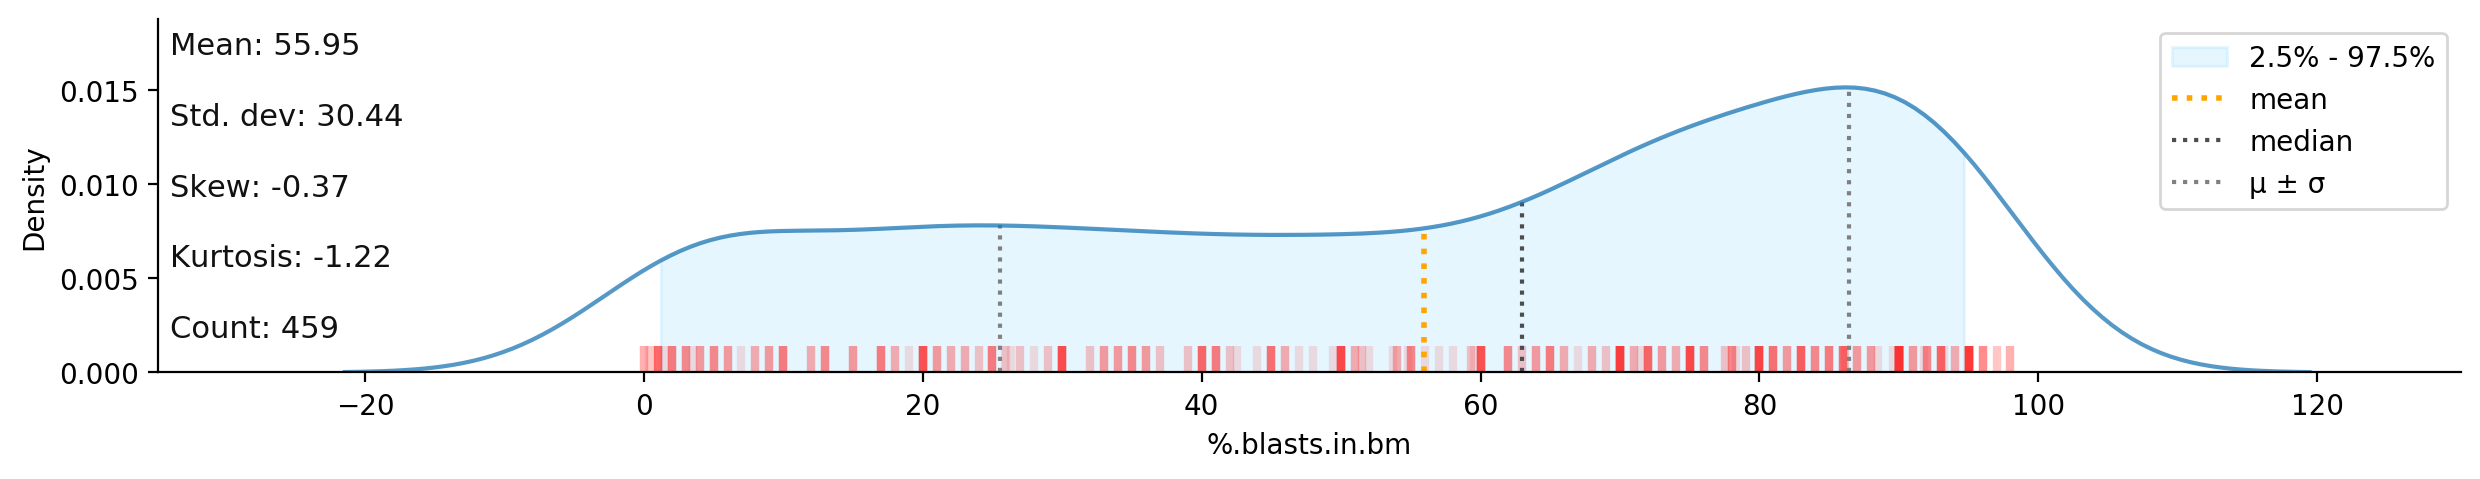

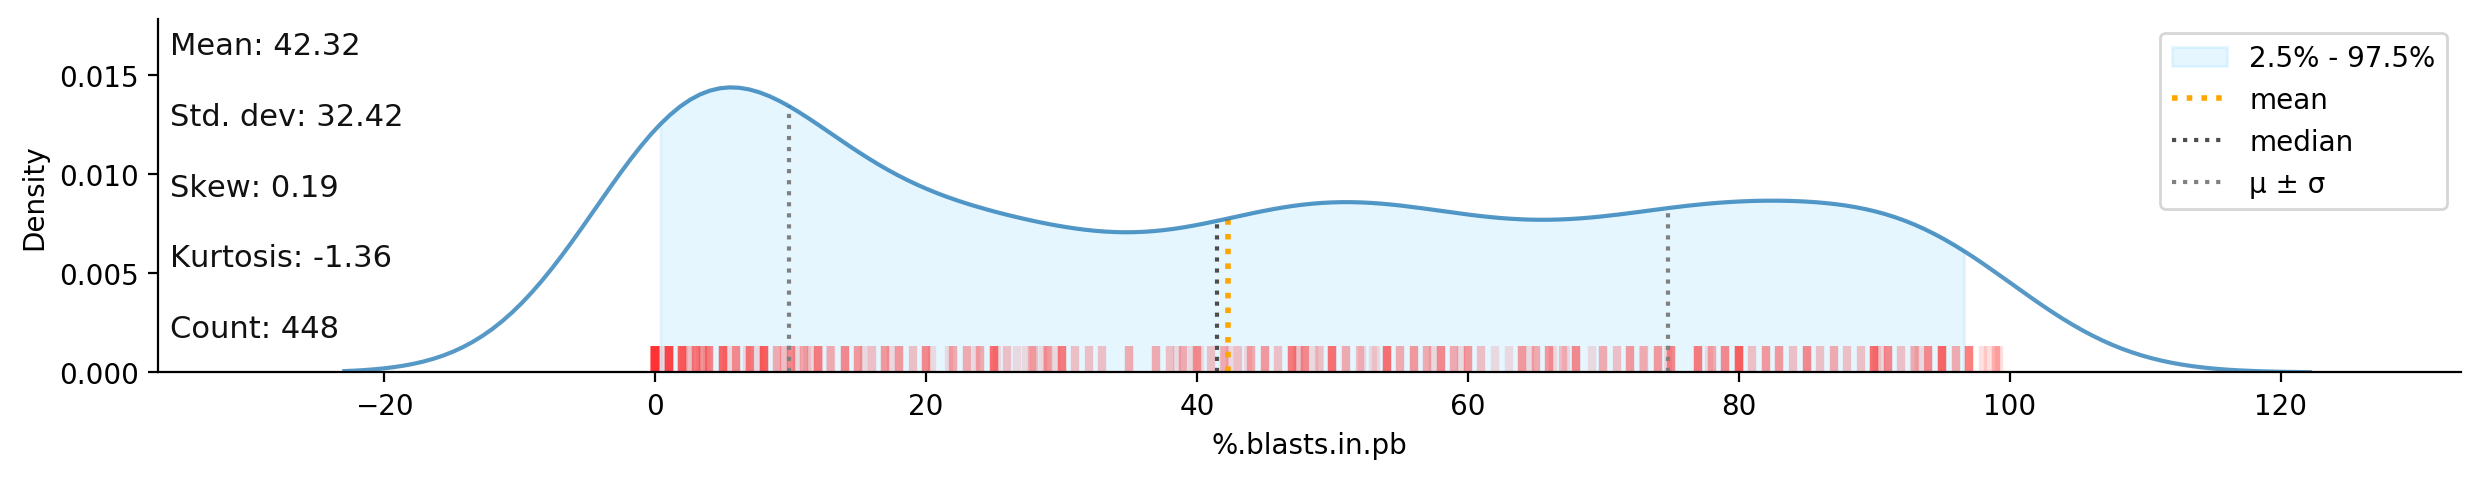

In [403]:
klib.dist_plot(clsm_cut)

In [404]:
clsm_cut.describe()

,patientid,overallsurvival,%.blasts.in.bm,%.blasts.in.pb
count,672.000000,607.000000,459.000000,448.000000
mean,2088.020833,441.881384,55.949325,42.316629
std,973.372734,479.180429,30.440925,32.418249
min,17.000000,-1.000000,0.000000,0.000000
25%,1450.750000,167.000000,30.000000,10.000000
50%,2016.000000,323.000000,63.000000,41.500000
75%,2501.500000,555.000000,83.000000,72.000000
max,4380.000000,5305.000000,98.000000,99.200000


In [405]:
#From distibution, skewness suggest median is the best representation. 
clsm_cut['overallsurvival'] = clsm_cut['overallsurvival'].fillna(clsm_cut['overallsurvival'].median())
clsm_cut['%.blasts.in.bm'] = clsm_cut['%.blasts.in.bm'].fillna(clsm_cut['%.blasts.in.bm'].median())
clsm_cut['%.blasts.in.pb'] = clsm_cut['%.blasts.in.pb'].fillna(clsm_cut['%.blasts.in.pb'].median())

In [406]:
#Replace categorical NaN with unknown 
clsm_cut = clsm_cut.replace(np.nan, 'unknown', regex=True)

In [407]:
#Determine mode of inferred_ethnicity:
clsm_cut['inferred_ethnicity'].mode()

0    White
dtype: object

In [408]:
#In inferred_ethnicity, replace mode of unknown to white:
clsm_cut['inferred_ethnicity'] = clsm_cut['inferred_ethnicity'].replace(['unknown'], 'white')

clsm_cut['inferred_ethnicity'].unique()

array(['White', 'HispNative', 'AdmixedBlack', 'Asian', 'Black',
       'AdmixedAsian', 'white', 'AdmixedWhite', 'AdmixedHispNative'],
      dtype=object)

In [409]:
#Determine mode of flt3-itd:
clsm_cut['flt3-itd'].mode()

0    negative
dtype: object

In [410]:
#In flt3-itd, replace mode of unknown to negative:
clsm_cut['flt3-itd'] = clsm_cut['flt3-itd'].replace(['unknown'], 'negative')

clsm_cut['flt3-itd'].unique()

array(['positive', 'negative'], dtype=object)

In [411]:
#Determine mode of npm1:
clsm_cut['npm1'].mode()

0    negative
dtype: object

In [412]:
#In npm1, replace mode of unknown to negative:
clsm_cut['npm1'] = clsm_cut['npm1'].replace(['unknown'], 'negative')

clsm_cut['npm1'].unique()

array(['positive', 'negative'], dtype=object)

In [413]:
klib.missingval_plot(clsm_cut)

No missing values found in the dataset.


In [414]:
clsm_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   labid                      672 non-null    object 
 1   patientid                  672 non-null    int64  
 2   consensus_sex              672 non-null    object 
 3   inferred_ethnicity         672 non-null    object 
 4   isrelapse                  672 non-null    bool   
 5   istransformed              672 non-null    bool   
 6   priormalignancynonmyeloid  672 non-null    object 
 7   priormds                   672 non-null    object 
 8   priormdsmpn                672 non-null    object 
 9   priormpn                   672 non-null    object 
 10  eln2017                    672 non-null    object 
 11  dxatspecimenacquisition    672 non-null    object 
 12  vitalstatus                672 non-null    object 
 13  overallsurvival            672 non-null    float64

## Check for Duplicates

In [415]:
clsm_cut = clsm_cut.drop_duplicates(ignore_index=True)
clsm_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   labid                      672 non-null    object 
 1   patientid                  672 non-null    int64  
 2   consensus_sex              672 non-null    object 
 3   inferred_ethnicity         672 non-null    object 
 4   isrelapse                  672 non-null    bool   
 5   istransformed              672 non-null    bool   
 6   priormalignancynonmyeloid  672 non-null    object 
 7   priormds                   672 non-null    object 
 8   priormdsmpn                672 non-null    object 
 9   priormpn                   672 non-null    object 
 10  eln2017                    672 non-null    object 
 11  dxatspecimenacquisition    672 non-null    object 
 12  vitalstatus                672 non-null    object 
 13  overallsurvival            672 non-null    float64

# Transformation (Final Preparation before Data Modeling)

### Create Target Variable

In [416]:
clsm_cut['dxatspecimenacquisition'].value_counts()

ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PRECURSOR NEOPLASMS    646
MYELODYSPLASTIC SYNDROMES                                         15
MYELODYSPLASTIC/MYELOPROLIFERATIVE NEOPLASMS                       4
ACUTE LEUKAEMIAS OF AMBIGUOUS LINEAGE                              3
MYELOPROLIFERATIVE NEOPLASMS                                       3
MATURE B-CELL NEOPLASMS                                            1
Name: dxatspecimenacquisition, dtype: int64

In [417]:
#create column for AML detected
clsm_cut['AML_detected'] = ['yes' if x == 'ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PRECURSOR NEOPLASMS' 
                            else 'no' for x in clsm_cut['dxatspecimenacquisition']]

In [418]:
clsm_cut.head()

,labid,patientid,consensus_sex,inferred_ethnicity,isrelapse,istransformed,priormalignancynonmyeloid,priormds,priormdsmpn,priormpn,eln2017,dxatspecimenacquisition,vitalstatus,overallsurvival,%.blasts.in.bm,%.blasts.in.pb,flt3-itd,npm1,AML_detected
0,09-00705,163,Male,White,False,False,n,n,n,n,FavorableOrIntermediate,ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...,Dead,425.0,94.0,97.0,positive,positive,yes
1,10-00136,174,Male,White,False,False,n,n,n,n,Adverse,ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...,Dead,419.0,80.0,19.0,positive,negative,yes
2,10-00172,175,Female,White,False,False,n,n,n,n,IntermediateOrAdverse,ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...,Dead,541.0,91.0,99.0,positive,negative,yes
3,10-00507,45,Female,White,False,False,n,n,n,n,FavorableOrIntermediate,ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...,Dead,511.0,97.0,97.0,positive,positive,yes
4,10-00542,174,Male,White,True,False,n,n,n,n,Adverse,ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...,Dead,419.0,87.0,80.0,positive,negative,yes


Transform select categorical attributes to numerical:


In [419]:
#AML_detected
clsm_cut['AML_detected'].replace(['no', 'yes'],
                        [0, 1], inplace=True)

#npm1
clsm_cut['npm1'].replace(['negative', 'positive'],
                        [0, 1], inplace=True)

#flt3-itd
clsm_cut['flt3-itd'].replace(['negative', 'positive'],
                        [0, 1], inplace=True)

#priormalignancynonmyeloid
clsm_cut['priormalignancynonmyeloid'].replace(['n', 'y'],
                        [0, 1], inplace=True)

#priormds
clsm_cut['priormds'].replace(['y', 'n'],
                        [1, 0], inplace=True)

#priormdsmpn
clsm_cut['priormdsmpn'].replace(['n', 'y'],
                        [0, 1], inplace=True)

#priormpn
clsm_cut['priormpn'].replace(['n', 'y'],
                        [0, 1], inplace=True)

#isrelapse
clsm_cut['isrelapse'].replace(['False', 'True'],
                        [0, 1], inplace=True)

#istransformed
clsm_cut['istransformed'].replace(['True', 'False'],
                        [1, 0], inplace=True)

In [420]:
clsm_t = pd.DataFrame(clsm_cut[['AML_detected', 'npm1', 'flt3-itd', 'isrelapse', 'istransformed',
                                'priormalignancynonmyeloid', 'priormds', 'priormdsmpn', 'priormpn',
                                '%.blasts.in.pb', '%.blasts.in.bm', 'overallsurvival']])

In [421]:
#Transform data type:
clsm_t['npm1'] = clsm_cut['npm1'].astype(int)
clsm_t['flt3-itd'] = clsm_cut['flt3-itd'].astype(int)

clsm_t['isrelapse'] = clsm_cut['isrelapse'].astype(int)
clsm_t['istransformed'] = clsm_cut['istransformed'].astype(int)

### One Hot encoding

In [422]:
clsm_t = pd.get_dummies(clsm_t, columns= ['npm1', 'flt3-itd', 'priormalignancynonmyeloid', 
                                                  'priormds', 'priormdsmpn', 'priormpn', 'isrelapse', 'istransformed'])

In [423]:
clsm_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AML_detected                 672 non-null    int64  
 1   %.blasts.in.pb               672 non-null    float64
 2   %.blasts.in.bm               672 non-null    float64
 3   overallsurvival              672 non-null    float64
 4   npm1_0                       672 non-null    uint8  
 5   npm1_1                       672 non-null    uint8  
 6   flt3-itd_0                   672 non-null    uint8  
 7   flt3-itd_1                   672 non-null    uint8  
 8   priormalignancynonmyeloid_0  672 non-null    uint8  
 9   priormalignancynonmyeloid_1  672 non-null    uint8  
 10  priormds_0                   672 non-null    uint8  
 11  priormds_1                   672 non-null    uint8  
 12  priormdsmpn_0                672 non-null    uint8  
 13  priormdsmpn_1       

In [424]:
clsm_t.head()

,AML_detected,%.blasts.in.pb,%.blasts.in.bm,overallsurvival,npm1_0,npm1_1,flt3-itd_0,flt3-itd_1,priormalignancynonmyeloid_0,priormalignancynonmyeloid_1,priormds_0,priormds_1,priormdsmpn_0,priormdsmpn_1,priormpn_0,priormpn_1,isrelapse_0,isrelapse_1,istransformed_0,istransformed_1
0,1,97.0,94.0,425.0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0
1,1,19.0,80.0,419.0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0
2,1,99.0,91.0,541.0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0
3,1,97.0,97.0,511.0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0
4,1,80.0,87.0,419.0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0


Transform Headers

In [425]:
clsm_t = clsm_t.rename(columns={ '%.blasts.in.pb': 'Feature_1', '%.blasts.in.bm': 'Feature_2', 
                                           'overallsurvival': 'Feature_3', 
                                            'npm1_0': 'Feature_4', 'npm1_1': 'Feature_5', 
                                           'flt3-itd_0': 'Feature_6', 'flt3-itd_1': 'Feature_7', 
                                            'priormalignancynonmyeloid_0': 'Feature_8', 'priormalignancynonmyeloid_1': 'Feature_9', 
                                            'priormds_0': 'Feature_10', 'priormds_1': 'Feature_11', 
                                           'priormdsmpn_0': 'Feature_12', 'priormdsmpn_1': 'Feature_13', 
                                            'priormpn_0': 'Feature_14', 'priormpn_1': 'Feature_15', 
                                            'isrelapse_0': 'Feature_16', 'isrelapse_1': 'Feature_17', 
                                           'istransformed_0': 'Feature_18', 'istransformed_1': 'Feature_19' })

In [426]:
clsm_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AML_detected  672 non-null    int64  
 1   Feature_1     672 non-null    float64
 2   Feature_2     672 non-null    float64
 3   Feature_3     672 non-null    float64
 4   Feature_4     672 non-null    uint8  
 5   Feature_5     672 non-null    uint8  
 6   Feature_6     672 non-null    uint8  
 7   Feature_7     672 non-null    uint8  
 8   Feature_8     672 non-null    uint8  
 9   Feature_9     672 non-null    uint8  
 10  Feature_10    672 non-null    uint8  
 11  Feature_11    672 non-null    uint8  
 12  Feature_12    672 non-null    uint8  
 13  Feature_13    672 non-null    uint8  
 14  Feature_14    672 non-null    uint8  
 15  Feature_15    672 non-null    uint8  
 16  Feature_16    672 non-null    uint8  
 17  Feature_17    672 non-null    uint8  
 18  Feature_18    672 non-null    

# Auto ML

In [427]:
df_automl = clsm_t
clsm_t.shape

(672, 20)

Balance the data set

In [428]:
#resampling of training data set
to_resample= df_automl.loc[df_automl["AML_detected"] == 0] #isolate all records of AML_detected
our_resample=to_resample.sample(n=560, replace=True) #sample w/ replacement
df_rebal=pd.concat([df_automl, our_resample]) #combine original training set w/ resampled records
df_rebal["AML_detected"].value_counts()

1    646
0    586
Name: AML_detected, dtype: int64

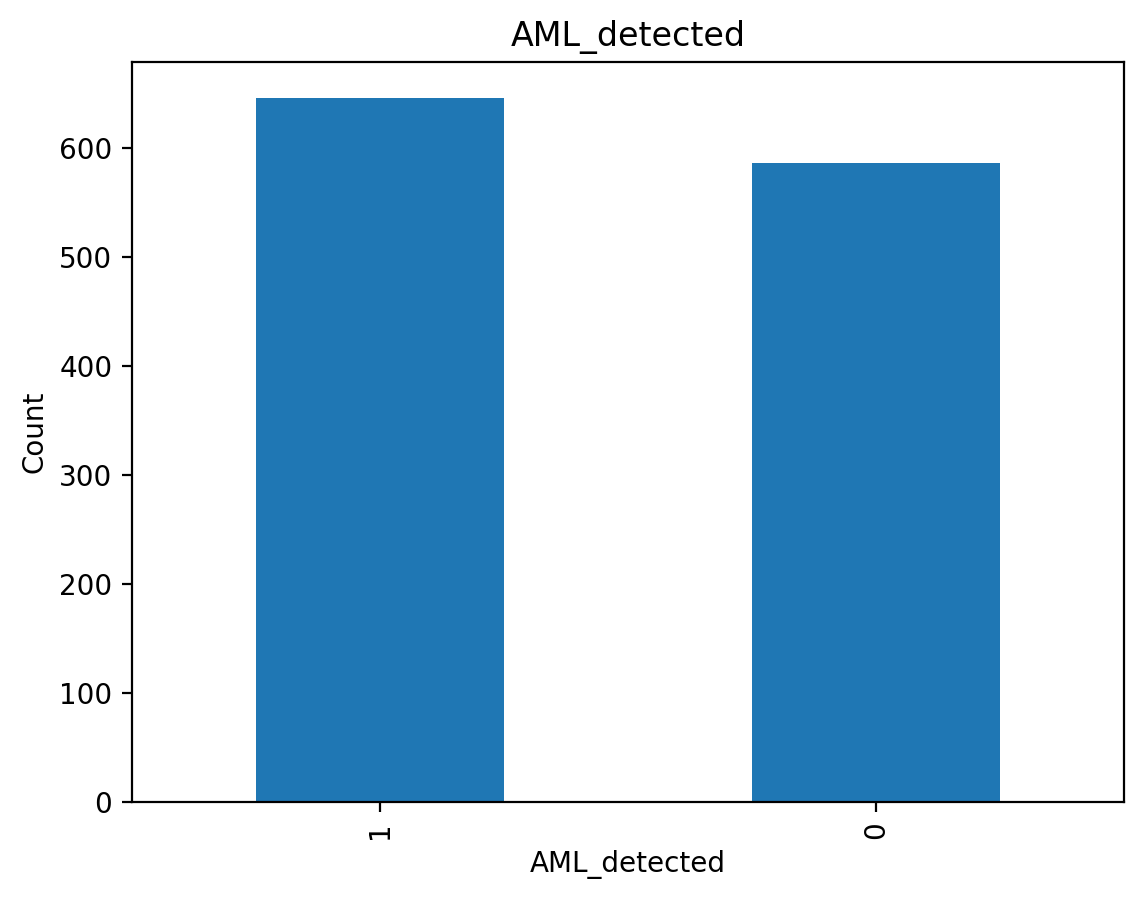

In [429]:
import matplotlib.pyplot as plt

df_rebal["AML_detected"].value_counts().plot(kind="bar", title="AML_detected")
plt.xlabel("AML_detected")
plt.ylabel("Count")

plt.show()

## Split into Train, Validation, and Test Sets

In [430]:
from sklearn.model_selection import train_test_split

# Split all data into 70% train and 30% holdout
df_train, df_holdout = train_test_split(df_rebal, test_size=0.30, stratify=df_rebal["AML_detected"])

# Split holdout data into 50% validation and 50% test
df_validation, df_test = train_test_split(df_holdout, test_size=0.50, stratify=df_holdout["AML_detected"])

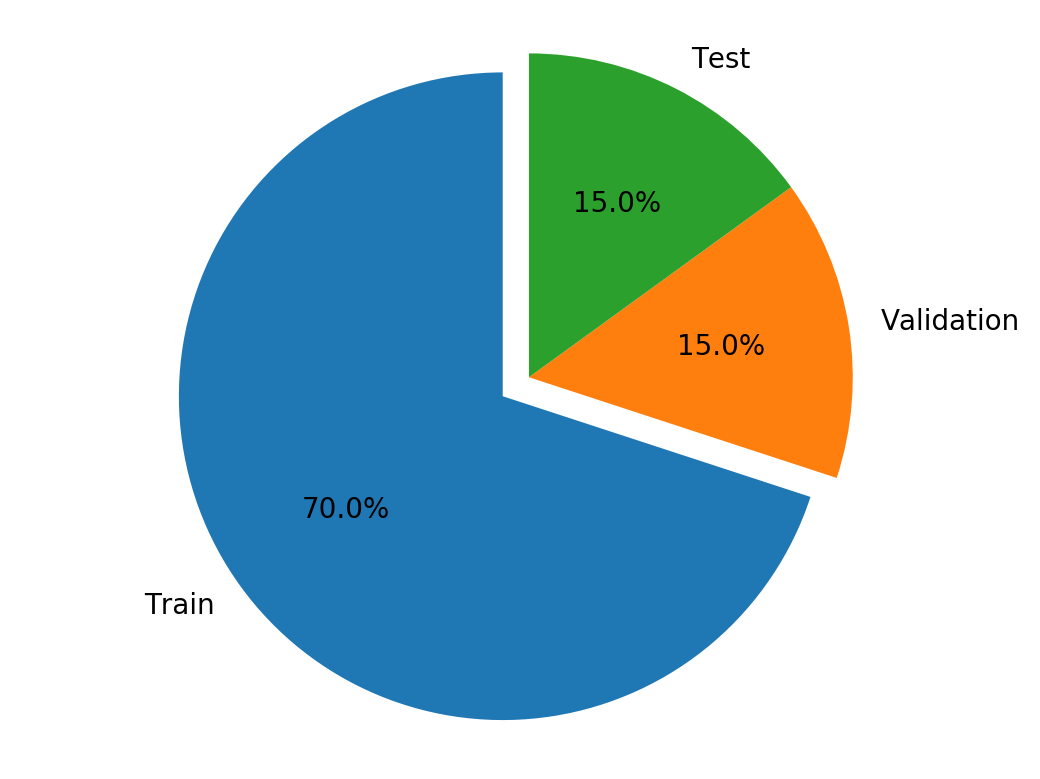

In [431]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ["Train", "Validation", "Test"]
sizes = [len(df_train.index), len(df_validation.index), len(df_test.index)]
explode = (0.1, 0, 0)

fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis("equal")

plt.show()

### Show 70% Train Data Split

In [432]:
df_train.shape

(862, 20)

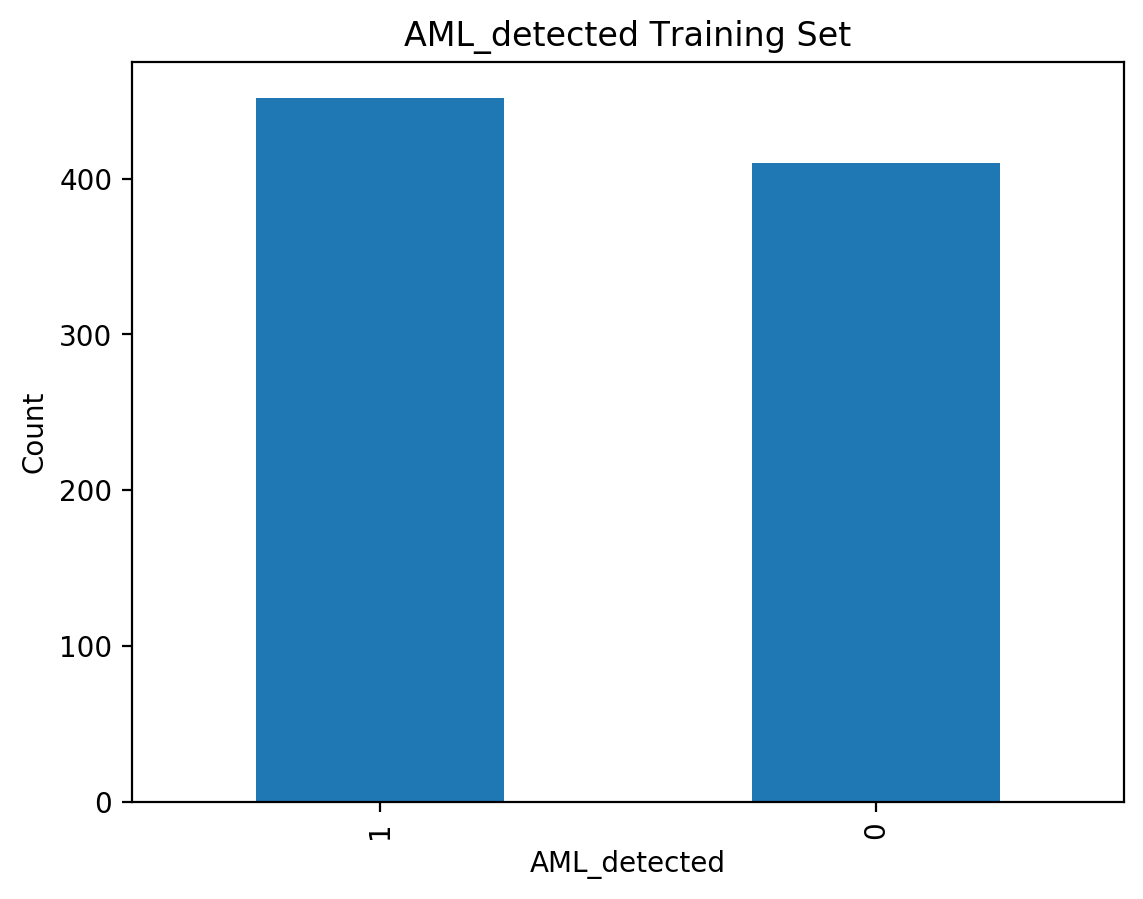

In [433]:
df_train["AML_detected"].value_counts().plot(kind="bar", title="AML_detected Training Set")
plt.xlabel("AML_detected")
plt.ylabel("Count")

plt.show()

### Show 15% Validation Split

In [434]:
df_validation.shape

(185, 20)

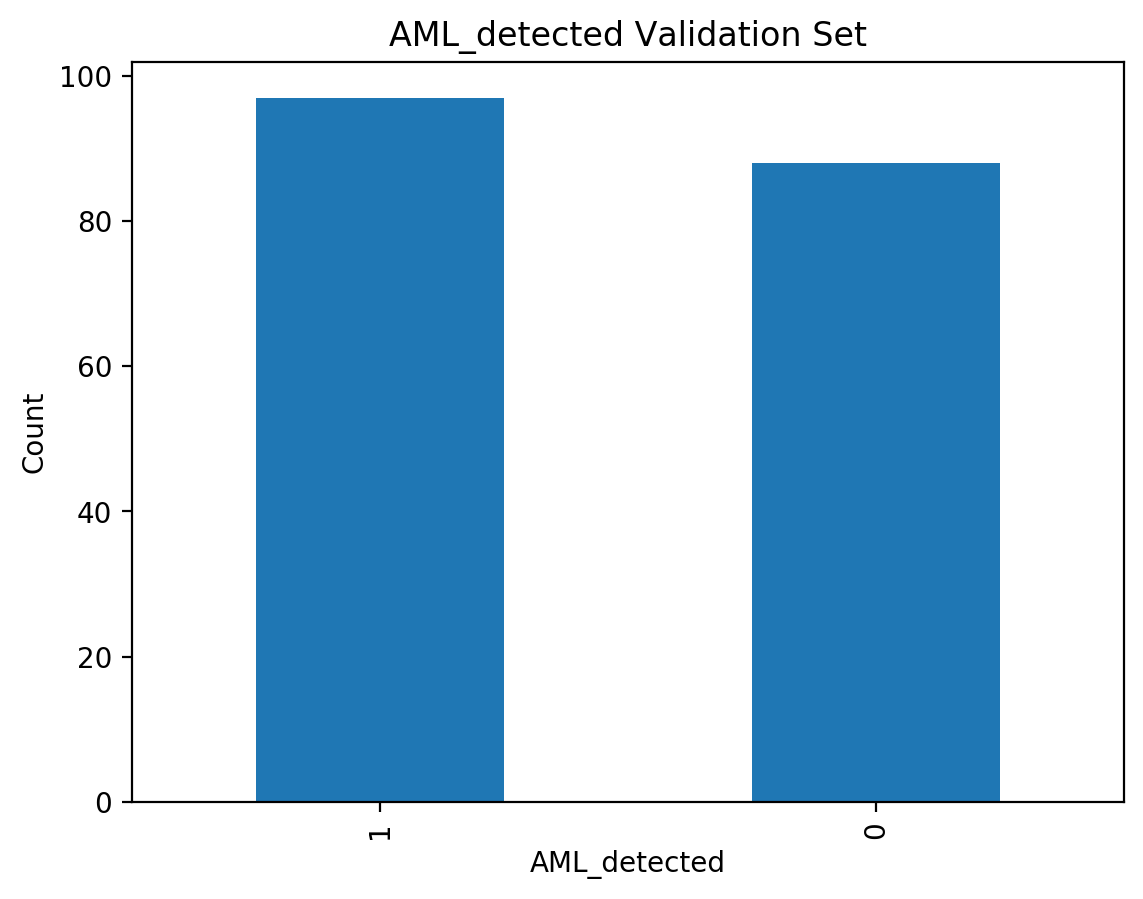

In [435]:
df_validation["AML_detected"].value_counts().plot(kind="bar", title="AML_detected Validation Set")
plt.xlabel("AML_detected")
plt.ylabel("Count")

plt.show()

### Show 15% Test Data Split

In [436]:
df_test.shape

(185, 20)

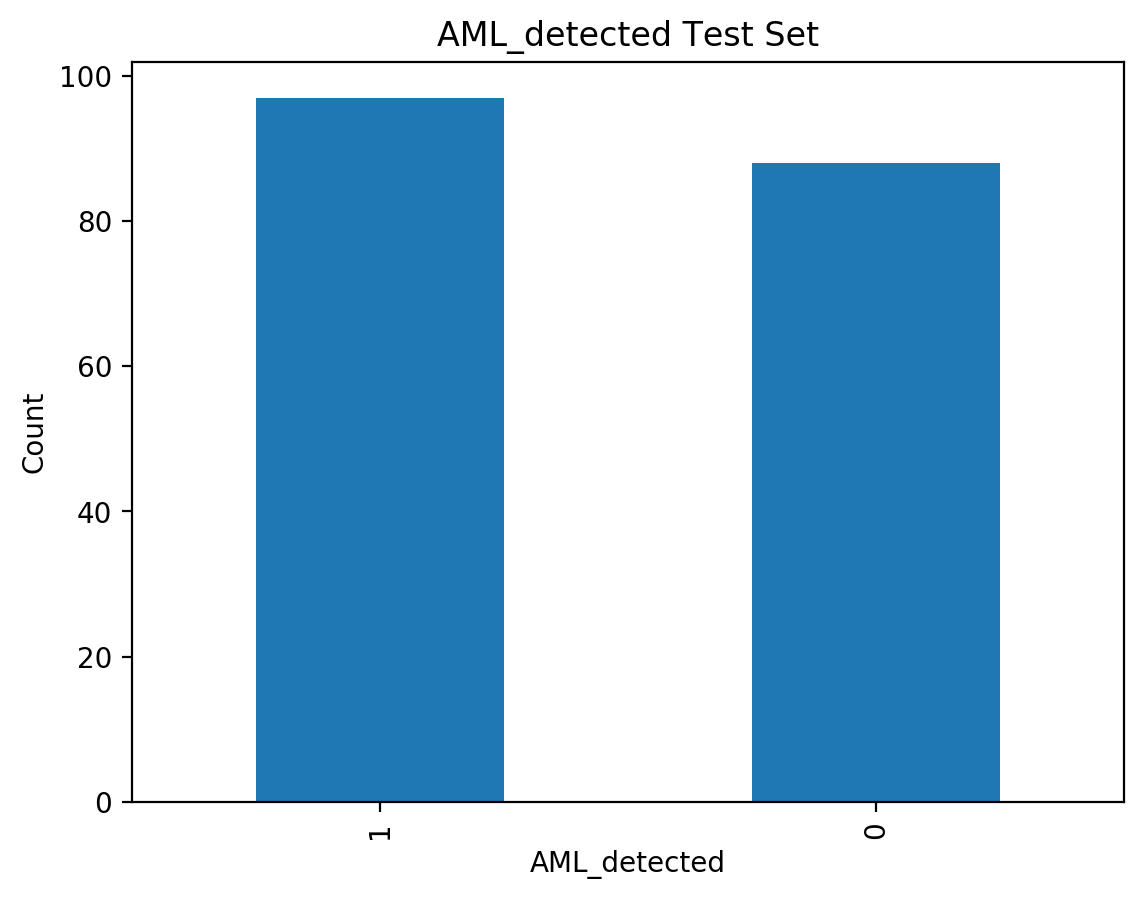

In [437]:
df_test["AML_detected"].value_counts().plot(kind="bar", title="AML_detected Test Set")
plt.xlabel("AML_detected")
plt.ylabel("Count")

plt.show()

### Write a Train CSV with Header for Autopilot

In [438]:
autopilot_train_path = "./df_autopilot.csv"
df_train.to_csv(autopilot_train_path, index=False, header=True)

### Upload Train Data to S3 for Autopilot

In [439]:
train_s3_prefix = "data"
autopilot_train_s3_uri = sess.upload_data(path=autopilot_train_path, key_prefix=train_s3_prefix)
autopilot_train_s3_uri

's3://sagemaker-us-east-1-614093401978/data/df_autopilot.csv'

In [440]:
!aws s3 ls $autopilot_train_s3_uri

2023-04-16 22:40:59      42706 df_autopilot.csv


Store Variables

In [441]:
%store autopilot_train_s3_uri

Stored 'autopilot_train_s3_uri' (str)


In [442]:
%store

Stored variables and their in-db values:
auto_ml_job_name                           -> 'automl-dm-16-20-10-05'
autopilot_endpoint_arn                     -> 'arn:aws:sagemaker:us-east-1:614093401978:endpoint
autopilot_endpoint_name                    -> 'automl-dm-ep-16-22-24-43'
autopilot_model_arn                        -> 'arn:aws:sagemaker:us-east-1:614093401978:model/au
autopilot_model_name                       -> 'automl-dm-model-16-22-20-58'
autopilot_train_s3_uri                     -> 's3://sagemaker-us-east-1-614093401978/data/df_aut
ingest_create_athena_db_passed             -> True
s3_private_path_csv                        -> 's3://sagemaker-us-east-1-614093401978/cell_data'
s3_public_path_clsm                        -> 's3://team4rawdatasets/CSV/Input/OHSU_BeatAML_Clin
s3_public_path_csv                         -> 's3://gdc-beataml1.0-crenolanib-phs001628-2-open/'
s3_public_path_pi                          -> 's3://team4rawdatasets/CSV/Input/OpenCell_ProteinI
setup_depen

# Train AML Detection

Training Data

In [443]:
print(autopilot_train_s3_uri)

s3://sagemaker-us-east-1-614093401978/data/df_autopilot.csv


In [444]:
!aws s3 ls $autopilot_train_s3_uri

2023-04-16 22:40:59      42706 df_autopilot.csv


See our prepared traiing data which we use as input for Autopilot

In [445]:
!aws s3 cp $autopilot_train_s3_uri ./tmp/

download: s3://sagemaker-us-east-1-614093401978/data/df_autopilot.csv to tmp/df_autopilot.csv


In [446]:
import csv

df = pd.read_csv("./tmp/df_autopilot.csv")
df.head()



,AML_detected,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19
0,0,41.5,15.0,5305.0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0
1,1,7.0,19.0,14.0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
2,1,92.0,85.0,24.0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
3,1,41.5,63.0,288.0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
4,0,15.0,63.0,299.0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0


## Setup the S3 location for the Autopilot-Generated Assests
This includes Jupyter Notebooks (analysis), Python Scripts (Feature Engineering), and Trained Models

In [447]:
prefix_model_output = "models/autopilot"

model_output_s3_uri = "s3://{}/{}".format(bucket, prefix_model_output)

print(model_output_s3_uri)

s3://sagemaker-us-east-1-614093401978/models/autopilot


In [448]:
max_candidates = 3

job_config = {
    "CompletionCriteria": {
        "MaxRuntimePerTrainingJobInSeconds": 900,
        "MaxCandidates": max_candidates,
        "MaxAutoMLJobRuntimeInSeconds": 5400,
    },
}

input_data_config = [
    {
        "DataSource": {"S3DataSource": {"S3DataType": "S3Prefix", "S3Uri": "{}".format(autopilot_train_s3_uri)}},
        "TargetAttributeName": "AML_detected",
    }
]

output_data_config = {"S3OutputPath": "{}".format(model_output_s3_uri)}



### Check for existing Autopilot jobs

In [449]:
existing_jobs_response = sm.list_auto_ml_jobs()

In [450]:
num_existing_jobs = 0
running_jobs = 0

if "AutoMLJobSummaries" in existing_jobs_response.keys():
    job_list = existing_jobs_response["AutoMLJobSummaries"]
    num_existing_jobs = len(job_list)
    # print('[INFO] You already created {} Autopilot job(s) in this account.'.format(num_existing_jobs))
    for j in job_list:
        if "AutoMLJobStatus" in j.keys():
            if j["AutoMLJobStatus"] == "InProgress":
                running_jobs = running_jobs + 1
    print("[INFO] You have {} Autopilot job(s) currently running << Should be 0 jobs.".format(running_jobs))
else:
    print("[OK] Please continue.")

[INFO] You have 0 Autopilot job(s) currently running << Should be 0 jobs.


# Launch Sagemaker Autopilot Job

In [451]:
from time import gmtime, strftime, sleep

In [452]:
%store -r auto_ml_job_name

try:
    auto_ml_job_name
except NameError:
    timestamp_suffix = strftime("%d-%H-%M-%S", gmtime())
    auto_ml_job_name = "automl-dm-" + timestamp_suffix
    print("Created AutoMLJobName: " + auto_ml_job_name)

In [453]:
print(auto_ml_job_name)

automl-dm-16-20-10-05


In [454]:
%store auto_ml_job_name

Stored 'auto_ml_job_name' (str)


In [455]:
max_running_jobs = 1

if running_jobs < max_running_jobs:  # Limiting to max. 1 Jobs
    try:
        sm.create_auto_ml_job(
            AutoMLJobName=auto_ml_job_name,
            InputDataConfig=input_data_config,
            OutputDataConfig=output_data_config,
            AutoMLJobConfig=job_config,
            RoleArn=role,
        )
        print("[OK] Autopilot Job {} created.".format(auto_ml_job_name))
        running_jobs = running_jobs + 1
    except:
        print(
            "[INFO] You have already launched an Autopilot job. Please continue see the output of this job.".format(
                running_jobs
            )
        )
else:
    print(
        "[INFO] You have already launched {} Autopilot running job(s). Please continue see the output of the running job.".format(
            running_jobs
        )
    )

[INFO] You have already launched an Autopilot job. Please continue see the output of this job.


Analyzing Data and Generate Notebooks

In [456]:
job_description_response = sm.describe_auto_ml_job(AutoMLJobName=auto_ml_job_name)

while (
    "AutoMLJobStatus" not in job_description_response.keys()
    and "AutoMLJobSecondaryStatus" not in job_description_response.keys()
):
    job_description_response = sm.describe_auto_ml_job(AutoMLJobName=auto_ml_job_name)
    print("[INFO] Autopilot Job has not yet started. Please wait. ")
    print(json.dumps(job_description_response, indent=4, sort_keys=True, default=str))
    print("[INFO] Waiting for Autopilot Job to start...")
    sleep(15)

print("[OK] AutoMLJob started.")

[OK] AutoMLJob started.


Review the Sagemaker Processing Jobs

In [457]:
from IPython.core.display import display, HTML

display(
    HTML(
        '<b>Review <a target="blank" href="https://console.aws.amazon.com/sagemaker/home?region={}#/processing-jobs/">Processing Jobs</a></b>'.format(
            region
        )
    )
)

#### The next cell will show InProgress for a few minutes

In [458]:
%%time

job_status = job_description_response["AutoMLJobStatus"]
job_sec_status = job_description_response["AutoMLJobSecondaryStatus"]

if job_status not in ("Stopped", "Failed"):
    while job_status in ("InProgress") and job_sec_status in ("Starting", "AnalyzingData"):
        job_description_response = sm.describe_auto_ml_job(AutoMLJobName=auto_ml_job_name)
        job_status = job_description_response["AutoMLJobStatus"]
        job_sec_status = job_description_response["AutoMLJobSecondaryStatus"]
        print(job_status, job_sec_status)
        sleep(15)
    print("[OK] Data analysis phase completed.\n")

print(json.dumps(job_description_response, indent=4, sort_keys=True, default=str))

[OK] Data analysis phase completed.

{
    "AutoMLJobArn": "arn:aws:sagemaker:us-east-1:614093401978:automl-job/automl-dm-16-20-10-05",
    "AutoMLJobArtifacts": {
        "CandidateDefinitionNotebookLocation": "s3://sagemaker-us-east-1-614093401978/models/autopilot/automl-dm-16-20-10-05/sagemaker-automl-candidates/automl-dm-16-20-10-05-pr-1-4b26f436ffcc4edaace14844f354501a5785/notebooks/SageMakerAutopilotCandidateDefinitionNotebook.ipynb",
        "DataExplorationNotebookLocation": "s3://sagemaker-us-east-1-614093401978/models/autopilot/automl-dm-16-20-10-05/sagemaker-automl-candidates/automl-dm-16-20-10-05-pr-1-4b26f436ffcc4edaace14844f354501a5785/notebooks/SageMakerAutopilotDataExplorationNotebook.ipynb"
    },
    "AutoMLJobConfig": {
        "CompletionCriteria": {
            "MaxAutoMLJobRuntimeInSeconds": 5400,
            "MaxCandidates": 3,
            "MaxRuntimePerTrainingJobInSeconds": 900
        }
    },
    "AutoMLJobName": "automl-dm-16-20-10-05",
    "AutoMLJobSeconda

# View Generated Notebook Samples

In [459]:
job_description_response = sm.describe_auto_ml_job(AutoMLJobName=auto_ml_job_name)

while "AutoMLJobArtifacts" not in job_description_response.keys():
    job_description_response = sm.describe_auto_ml_job(AutoMLJobName=auto_ml_job_name)
    print("[INFO] Autopilot Job has not yet generated the artifacts. Please wait. ")
    print(json.dumps(job_description_response, indent=4, sort_keys=True, default=str))
    print("[INFO] Waiting for AutoMLJobArtifacts...")
    sleep(15)

print("[OK] AutoMLJobArtifacts generated.")

[OK] AutoMLJobArtifacts generated.


In [460]:
job_description_response = sm.describe_auto_ml_job(AutoMLJobName=auto_ml_job_name)

while "DataExplorationNotebookLocation" not in job_description_response["AutoMLJobArtifacts"].keys():
    job_description_response = sm.describe_auto_ml_job(AutoMLJobName=auto_ml_job_name)
    print("[INFO] Autopilot Job has not yet generated the notebooks. Please wait. ")
    print(json.dumps(job_description_response, indent=4, sort_keys=True, default=str))
    print("[INFO] Waiting for DataExplorationNotebookLocation...")
    sleep(15)

print("[OK] DataExplorationNotebookLocation found.")

[OK] DataExplorationNotebookLocation found.


In [461]:
generated_resources = job_description_response["AutoMLJobArtifacts"]["DataExplorationNotebookLocation"]
download_path = generated_resources.rsplit("/notebooks/SageMakerAutopilotDataExplorationNotebook.ipynb")[0]
job_id = download_path.rsplit("/", 1)[-1]

In [462]:
from IPython.core.display import display, HTML

if not job_id:
    print("No AutoMLJobArtifacts found.")
else:
    display(
        HTML(
            '<b>Review <a target="blank" href="https://s3.console.aws.amazon.com/s3/buckets/{}/{}/{}/sagemaker-automl-candidates/{}/">S3 Generated Resources</a></b>'.format(
                bucket, prefix_model_output, auto_ml_job_name, job_id
            )
        )
    )

# Download Generated Notebooks and code

In [463]:
print(download_path)

s3://sagemaker-us-east-1-614093401978/models/autopilot/automl-dm-16-20-10-05/sagemaker-automl-candidates/automl-dm-16-20-10-05-pr-1-4b26f436ffcc4edaace14844f354501a5785


In [464]:
try:
    !aws s3 cp --recursive $download_path .
except:
    print('Could not download the generated resources. Make sure the path is correct.')

download: s3://sagemaker-us-east-1-614093401978/models/autopilot/automl-dm-16-20-10-05/sagemaker-automl-candidates/automl-dm-16-20-10-05-pr-1-4b26f436ffcc4edaace14844f354501a5785/generated_module/MANIFEST.in to generated_module/MANIFEST.in
download: s3://sagemaker-us-east-1-614093401978/models/autopilot/automl-dm-16-20-10-05/sagemaker-automl-candidates/automl-dm-16-20-10-05-pr-1-4b26f436ffcc4edaace14844f354501a5785/generated_module/README.md to generated_module/README.md
download: s3://sagemaker-us-east-1-614093401978/models/autopilot/automl-dm-16-20-10-05/sagemaker-automl-candidates/automl-dm-16-20-10-05-pr-1-4b26f436ffcc4edaace14844f354501a5785/generated_module/candidate_data_processors/dpp1.py to generated_module/candidate_data_processors/dpp1.py
download: s3://sagemaker-us-east-1-614093401978/models/autopilot/automl-dm-16-20-10-05/sagemaker-automl-candidates/automl-dm-16-20-10-05-pr-1-4b26f436ffcc4edaace14844f354501a5785/generated_module/candidate_data_processors/dpp2.py to generat

### Review the generated Resources

In [465]:
!ls ./generated_module/candidate_data_processors

dpp0.py  dpp1.py  dpp2.py  sagemaker_serve.py  trainer.py


In [466]:
!ls ./notebooks

SageMakerAutopilotCandidateDefinitionNotebook.ipynb  sagemaker_automl
SageMakerAutopilotDataExplorationNotebook.ipynb


In [467]:
from IPython.core.display import display, HTML

display(
    HTML(
        '<b>Review <a target="blank" href="https://console.aws.amazon.com/sagemaker/home?region={}#/jobs/">Training Jobs</a></b>'.format(
            region
        )
    )
)

In [468]:
from IPython.core.display import display, HTML

display(
    HTML(
        '<b>Review <a target="blank" href="https://console.aws.amazon.com/sagemaker/home?region={}#/transform-jobs/">Batch Transform Jobs</a></b>'.format(
            region
        )
    )
)

### The next cell will show InProgress for a few minutes

In [469]:
%%time

job_description_response = sm.describe_auto_ml_job(AutoMLJobName=auto_ml_job_name)
job_status = job_description_response["AutoMLJobStatus"]
job_sec_status = job_description_response["AutoMLJobSecondaryStatus"]
print(job_status)
print(job_sec_status)
if job_status not in ("Stopped", "Failed"):
    while job_status in ("InProgress") and job_sec_status in ("FeatureEngineering"):
        job_description_response = sm.describe_auto_ml_job(AutoMLJobName=auto_ml_job_name)
        job_status = job_description_response["AutoMLJobStatus"]
        job_sec_status = job_description_response["AutoMLJobSecondaryStatus"]
        print(job_status, job_sec_status)
        sleep(15)
    print("[OK] Feature engineering phase completed.\n")

print(json.dumps(job_description_response, indent=4, sort_keys=True, default=str))

Completed
Completed
[OK] Feature engineering phase completed.

{
    "AutoMLJobArn": "arn:aws:sagemaker:us-east-1:614093401978:automl-job/automl-dm-16-20-10-05",
    "AutoMLJobArtifacts": {
        "CandidateDefinitionNotebookLocation": "s3://sagemaker-us-east-1-614093401978/models/autopilot/automl-dm-16-20-10-05/sagemaker-automl-candidates/automl-dm-16-20-10-05-pr-1-4b26f436ffcc4edaace14844f354501a5785/notebooks/SageMakerAutopilotCandidateDefinitionNotebook.ipynb",
        "DataExplorationNotebookLocation": "s3://sagemaker-us-east-1-614093401978/models/autopilot/automl-dm-16-20-10-05/sagemaker-automl-candidates/automl-dm-16-20-10-05-pr-1-4b26f436ffcc4edaace14844f354501a5785/notebooks/SageMakerAutopilotDataExplorationNotebook.ipynb"
    },
    "AutoMLJobConfig": {
        "CompletionCriteria": {
            "MaxAutoMLJobRuntimeInSeconds": 5400,
            "MaxCandidates": 3,
            "MaxRuntimePerTrainingJobInSeconds": 900
        }
    },
    "AutoMLJobName": "automl-dm-16-20-10-

# Model Training and Tuning

In [470]:
from IPython.core.display import display, HTML

display(
    HTML(
        '<b>Review <a target="blank" href="https://console.aws.amazon.com/sagemaker/home?region={}#/hyper-tuning-jobs/">Hyperparameter Tuning Jobs</a></b>'.format(
            region
        )
    )
)

In [471]:
from IPython.core.display import display, HTML

display(
    HTML(
        '<b>Review <a target="blank" href="https://console.aws.amazon.com/sagemaker/home?region={}#/jobs/">Training Jobs</a></b>'.format(
            region
        )
    )
)

### The next cell will show InProgress for a few minutes

In [472]:
%%time

job_description_response = sm.describe_auto_ml_job(AutoMLJobName=auto_ml_job_name)
job_status = job_description_response["AutoMLJobStatus"]
job_sec_status = job_description_response["AutoMLJobSecondaryStatus"]
print(job_status)
print(job_sec_status)
if job_status not in ("Stopped", "Failed"):
    while job_status in ("InProgress") and job_sec_status in ("ModelTuning"):
        job_description_response = sm.describe_auto_ml_job(AutoMLJobName=auto_ml_job_name)
        job_status = job_description_response["AutoMLJobStatus"]
        job_sec_status = job_description_response["AutoMLJobSecondaryStatus"]
        print(job_status, job_sec_status)
        sleep(15)
    print("[OK] Model tuning phase completed.\n")

print(json.dumps(job_description_response, indent=4, sort_keys=True, default=str))

Completed
Completed
[OK] Model tuning phase completed.

{
    "AutoMLJobArn": "arn:aws:sagemaker:us-east-1:614093401978:automl-job/automl-dm-16-20-10-05",
    "AutoMLJobArtifacts": {
        "CandidateDefinitionNotebookLocation": "s3://sagemaker-us-east-1-614093401978/models/autopilot/automl-dm-16-20-10-05/sagemaker-automl-candidates/automl-dm-16-20-10-05-pr-1-4b26f436ffcc4edaace14844f354501a5785/notebooks/SageMakerAutopilotCandidateDefinitionNotebook.ipynb",
        "DataExplorationNotebookLocation": "s3://sagemaker-us-east-1-614093401978/models/autopilot/automl-dm-16-20-10-05/sagemaker-automl-candidates/automl-dm-16-20-10-05-pr-1-4b26f436ffcc4edaace14844f354501a5785/notebooks/SageMakerAutopilotDataExplorationNotebook.ipynb"
    },
    "AutoMLJobConfig": {
        "CompletionCriteria": {
            "MaxAutoMLJobRuntimeInSeconds": 5400,
            "MaxCandidates": 3,
            "MaxRuntimePerTrainingJobInSeconds": 900
        }
    },
    "AutoMLJobName": "automl-dm-16-20-10-05",
  

In [473]:
%%time

job_description_response = sm.describe_auto_ml_job(AutoMLJobName=auto_ml_job_name)
job_status = job_description_response["AutoMLJobStatus"]
print(job_status)
if job_status not in ("Stopped", "Failed"):
    while job_status not in ("Completed"):
        job_description_response = sm.describe_auto_ml_job(AutoMLJobName=auto_ml_job_name)
        job_status = job_description_response["AutoMLJobStatus"]
        print(job_status)
        sleep(10)
    print("[OK] Autopilot Job completed.\n")
else:
    print(job_status)

Completed
[OK] Autopilot Job completed.

CPU times: user 5.06 ms, sys: 397 µs, total: 5.45 ms
Wall time: 114 ms


# Viewing all Candidates

In [474]:
candidates_response = sm.list_candidates_for_auto_ml_job(
    AutoMLJobName=auto_ml_job_name, SortBy="FinalObjectiveMetricValue"
)

In [475]:
while "Candidates" not in candidates_response.keys():
    candidates_response = sm.list_candidates_for_auto_ml_job(
        AutoMLJobName=auto_ml_job_name, SortBy="FinalObjectiveMetricValue"
    )
    print("[INFO] Autopilot Job is generating the Candidates. Please wait.")
    print(json.dumps(candidates_response, indent=4, sort_keys=True, default=str))
    sleep(10)

candidates = candidates_response["Candidates"]
print("[OK] Candidates generated.")

[OK] Candidates generated.


In [476]:
print(candidates[0].keys())

dict_keys(['CandidateName', 'FinalAutoMLJobObjectiveMetric', 'ObjectiveStatus', 'CandidateSteps', 'CandidateStatus', 'InferenceContainers', 'CreationTime', 'EndTime', 'LastModifiedTime', 'CandidateProperties'])


In [477]:
while "CandidateName" not in candidates[0]:
    candidates_response = sm.list_candidates_for_auto_ml_job(
        AutoMLJobName=auto_ml_job_name, SortBy="FinalObjectiveMetricValue"
    )
    candidates = candidates_response["Candidates"]
    print("[INFO] Autopilot Job is generating CandidateName. Please wait. ")
    print(json.dumps(candidates, indent=4, sort_keys=True, default=str))
    sleep(10)

print("[OK] CandidateName generated.")

[OK] CandidateName generated.


In [478]:
while "FinalAutoMLJobObjectiveMetric" not in candidates[0]:
    candidates_response = sm.list_candidates_for_auto_ml_job(
        AutoMLJobName=auto_ml_job_name, SortBy="FinalObjectiveMetricValue"
    )
    candidates = candidates_response["Candidates"]
    print("[INFO] Autopilot Job is generating FinalAutoMLJobObjectiveMetric. Please wait. ")
    print(json.dumps(candidates, indent=4, sort_keys=True, default=str))
    sleep(10)

print("[OK] FinalAutoMLJobObjectiveMetric generated.")

[OK] FinalAutoMLJobObjectiveMetric generated.


In [479]:
print(json.dumps(candidates, indent=4, sort_keys=True, default=str))

[
    {
        "CandidateName": "automl-dm-16-20-10-054If5RqjsyAN-001-61c635e4",
        "CandidateProperties": {
            "CandidateArtifactLocations": {
                "Explainability": "s3://sagemaker-us-east-1-614093401978/models/autopilot/automl-dm-16-20-10-05/documentation/explainability/output",
                "ModelInsights": "s3://sagemaker-us-east-1-614093401978/models/autopilot/automl-dm-16-20-10-05/documentation/model_monitor/output"
            },
            "CandidateMetrics": [
                {
                    "MetricName": "F1",
                    "Set": "Validation",
                    "StandardMetricName": "F1",
                    "Value": 0.995169997215271
                },
                {
                    "MetricName": "LogLoss",
                    "Set": "Validation",
                    "StandardMetricName": "LogLoss",
                    "Value": 0.11816000193357468
                },
                {
                    "MetricName": "Reca

In [480]:
for index, candidate in enumerate(candidates):
    print(
        str(index)
        + "  "
        + candidate["CandidateName"]
        + "  "
        + str(candidate["FinalAutoMLJobObjectiveMetric"]["Value"])
    )

0  automl-dm-16-20-10-054If5RqjsyAN-001-61c635e4  0.995169997215271
1  automl-dm-16-20-10-054If5RqjsyAN-003-910bc585  0.9795699715614319
2  automl-dm-16-20-10-054If5RqjsyAN-002-ebe18ef1  0.9746400117874146


# Inspect Trials using Experiments API

In [481]:
from sagemaker.analytics import ExperimentAnalytics, TrainingJobAnalytics

exp = ExperimentAnalytics(
    sagemaker_session=sess,
    experiment_name=auto_ml_job_name + "-aws-auto-ml-job",
)

df = exp.dataframe()
print(df)

                                  TrialComponentName  \
0  automl-dm-16-20-10-054If5RqjsyAN-001-61c635e4-...   
1  automl-dm-16-20-10-054If5RqjsyAN-003-910bc585-...   
2  automl-dm-16-20-10-054If5RqjsyAN-002-ebe18ef1-...   
3  automl-dm-16-20-10-05-dpp1-csv-1-18357715aec34...   
4  automl-dm-16-20-10-05-dpp0-csv-1-0d6756d0637d4...   
5  automl-dm-16-20-10-05-dpp1-1-8411a0fbc81748a99...   
6  automl-dm-16-20-10-05-dpp0-1-cbc8bbf88b664a35a...   
7  automl-dm-16-20-10-05-db-1-2887815310fd4416804...   

                                         DisplayName  \
0  automl-dm-16-20-10-054If5RqjsyAN-001-61c635e4-...   
1  automl-dm-16-20-10-054If5RqjsyAN-003-910bc585-...   
2  automl-dm-16-20-10-054If5RqjsyAN-002-ebe18ef1-...   
3  automl-dm-16-20-10-05-dpp1-csv-1-18357715aec34...   
4  automl-dm-16-20-10-05-dpp0-csv-1-0d6756d0637d4...   
5  automl-dm-16-20-10-05-dpp1-1-8411a0fbc81748a99...   
6  automl-dm-16-20-10-05-dpp0-1-cbc8bbf88b664a35a...   
7  automl-dm-16-20-10-05-db-1-2887815310fd44168

## Explore the Best Candidate

In [482]:
best_candidate_response = sm.describe_auto_ml_job(AutoMLJobName=auto_ml_job_name)

In [483]:
print(best_candidate_response.keys())

dict_keys(['AutoMLJobName', 'AutoMLJobArn', 'InputDataConfig', 'OutputDataConfig', 'RoleArn', 'AutoMLJobConfig', 'CreationTime', 'EndTime', 'LastModifiedTime', 'BestCandidate', 'AutoMLJobStatus', 'AutoMLJobSecondaryStatus', 'GenerateCandidateDefinitionsOnly', 'AutoMLJobArtifacts', 'ResolvedAttributes', 'ResponseMetadata'])


In [484]:
while "BestCandidate" not in best_candidate_response:
    best_candidate_response = sm.describe_auto_ml_job(AutoMLJobName=auto_ml_job_name)
    print("[INFO] Autopilot Job is generating BestCandidate. Please wait. ")
    print(json.dumps(best_candidate_response, indent=4, sort_keys=True, default=str))
    sleep(10)

best_candidate = best_candidate_response["BestCandidate"]
print("[OK] BestCandidate generated.")

[OK] BestCandidate generated.


In [485]:
print(json.dumps(best_candidate_response, indent=4, sort_keys=True, default=str))

{
    "AutoMLJobArn": "arn:aws:sagemaker:us-east-1:614093401978:automl-job/automl-dm-16-20-10-05",
    "AutoMLJobArtifacts": {
        "CandidateDefinitionNotebookLocation": "s3://sagemaker-us-east-1-614093401978/models/autopilot/automl-dm-16-20-10-05/sagemaker-automl-candidates/automl-dm-16-20-10-05-pr-1-4b26f436ffcc4edaace14844f354501a5785/notebooks/SageMakerAutopilotCandidateDefinitionNotebook.ipynb",
        "DataExplorationNotebookLocation": "s3://sagemaker-us-east-1-614093401978/models/autopilot/automl-dm-16-20-10-05/sagemaker-automl-candidates/automl-dm-16-20-10-05-pr-1-4b26f436ffcc4edaace14844f354501a5785/notebooks/SageMakerAutopilotDataExplorationNotebook.ipynb"
    },
    "AutoMLJobConfig": {
        "CompletionCriteria": {
            "MaxAutoMLJobRuntimeInSeconds": 5400,
            "MaxCandidates": 3,
            "MaxRuntimePerTrainingJobInSeconds": 900
        }
    },
    "AutoMLJobName": "automl-dm-16-20-10-05",
    "AutoMLJobSecondaryStatus": "Completed",
    "AutoMLJo

In [486]:
print(best_candidate.keys())

dict_keys(['CandidateName', 'FinalAutoMLJobObjectiveMetric', 'ObjectiveStatus', 'CandidateSteps', 'CandidateStatus', 'InferenceContainers', 'CreationTime', 'EndTime', 'LastModifiedTime', 'CandidateProperties'])


In [487]:
while "CandidateName" not in best_candidate:
    best_candidate_response = sm.describe_auto_ml_job(AutoMLJobName=auto_ml_job_name)
    best_candidate = best_candidate_response["BestCandidate"]
    print("[INFO] Autopilot Job is generating BestCandidate CandidateName. Please wait. ")
    print(json.dumps(best_candidate, indent=4, sort_keys=True, default=str))
    sleep(10)

print("[OK] BestCandidate CandidateName generated.")

[OK] BestCandidate CandidateName generated.


In [488]:
while "FinalAutoMLJobObjectiveMetric" not in best_candidate:
    best_candidate_response = sm.describe_auto_ml_job(AutoMLJobName=auto_ml_job_name)
    best_candidate = best_candidate_response["BestCandidate"]
    print("[INFO] Autopilot Job is generating BestCandidate FinalAutoMLJobObjectiveMetric. Please wait. ")
    print(json.dumps(best_candidate, indent=4, sort_keys=True, default=str))
    sleep(10)

print("[OK] BestCandidate FinalAutoMLJobObjectiveMetric generated.")

[OK] BestCandidate FinalAutoMLJobObjectiveMetric generated.


In [489]:
best_candidate_identifier = best_candidate["CandidateName"]
print("Candidate name: " + best_candidate_identifier)
print("Metric name: " + best_candidate["FinalAutoMLJobObjectiveMetric"]["MetricName"])
print("Metric value: " + str(best_candidate["FinalAutoMLJobObjectiveMetric"]["Value"]))

Candidate name: automl-dm-16-20-10-054If5RqjsyAN-001-61c635e4
Metric name: validation:f1_binary
Metric value: 0.995169997215271


In [490]:
print(json.dumps(best_candidate, indent=4, sort_keys=True, default=str))

{
    "CandidateName": "automl-dm-16-20-10-054If5RqjsyAN-001-61c635e4",
    "CandidateProperties": {
        "CandidateArtifactLocations": {
            "Explainability": "s3://sagemaker-us-east-1-614093401978/models/autopilot/automl-dm-16-20-10-05/documentation/explainability/output",
            "ModelInsights": "s3://sagemaker-us-east-1-614093401978/models/autopilot/automl-dm-16-20-10-05/documentation/model_monitor/output"
        },
        "CandidateMetrics": [
            {
                "MetricName": "F1",
                "Set": "Validation",
                "StandardMetricName": "F1",
                "Value": 0.995169997215271
            },
            {
                "MetricName": "LogLoss",
                "Set": "Validation",
                "StandardMetricName": "LogLoss",
                "Value": 0.11816000193357468
            },
            {
                "MetricName": "Recall",
                "Set": "Validation",
                "StandardMetricName": "Recall",


### View individual Autopilot jobs

In [491]:
while "CandidateSteps" not in best_candidate:
    best_candidate_response = sm.describe_auto_ml_job(AutoMLJobName=auto_ml_job_name)
    best_candidate = best_candidate_response["BestCandidate"]
    print("[INFO] Autopilot Job is generating BestCandidate CandidateSteps. Please wait. ")
    print(json.dumps(best_candidate, indent=4, sort_keys=True, default=str))
    sleep(10)

best_candidate = best_candidate_response["BestCandidate"]
print("[OK] BestCandidate CandidateSteps generated.")

[OK] BestCandidate CandidateSteps generated.


In [492]:
while "CandidateStepType" not in best_candidate["CandidateSteps"][0]:
    best_candidate_response = sm.describe_auto_ml_job(AutoMLJobName=auto_ml_job_name)
    best_candidate = best_candidate_response["BestCandidate"]
    print("[INFO] Autopilot Job is generating BestCandidate CandidateSteps CandidateStepType. Please wait. ")
    print(json.dumps(best_candidate, indent=4, sort_keys=True, default=str))
    sleep(10)

best_candidate = best_candidate_response["BestCandidate"]
print("[OK] BestCandidate CandidateSteps CandidateStepType generated.")

[OK] BestCandidate CandidateSteps CandidateStepType generated.


In [493]:
while "CandidateStepName" not in best_candidate["CandidateSteps"][0]:
    best_candidate_response = sm.describe_auto_ml_job(AutoMLJobName=auto_ml_job_name)
    best_candidate = best_candidate_response["BestCandidate"]
    print("[INFO] Autopilot Job is generating BestCandidate CandidateSteps CandidateStepName. Please wait. ")
    print(json.dumps(best_candidate, indent=4, sort_keys=True, default=str))
    sleep(10)

best_candidate = best_candidate_response["BestCandidate"]
print("[OK] BestCandidate CandidateSteps CandidateStepName generated.")

[OK] BestCandidate CandidateSteps CandidateStepName generated.


In [494]:
best_candidate

{'CandidateName': 'automl-dm-16-20-10-054If5RqjsyAN-001-61c635e4',
 'FinalAutoMLJobObjectiveMetric': {'MetricName': 'validation:f1_binary',
  'Value': 0.995169997215271,
  'StandardMetricName': 'F1'},
 'ObjectiveStatus': 'Succeeded',
 'CandidateSteps': [{'CandidateStepType': 'AWS::SageMaker::ProcessingJob',
   'CandidateStepArn': 'arn:aws:sagemaker:us-east-1:614093401978:processing-job/automl-dm-16-20-10-05-db-1-2887815310fd4416804d2079485d7d062e1a',
   'CandidateStepName': 'automl-dm-16-20-10-05-db-1-2887815310fd4416804d2079485d7d062e1a'},
  {'CandidateStepType': 'AWS::SageMaker::TrainingJob',
   'CandidateStepArn': 'arn:aws:sagemaker:us-east-1:614093401978:training-job/automl-dm-16-20-10-05-dpp1-1-8411a0fbc81748a9958acf62493120d4d7',
   'CandidateStepName': 'automl-dm-16-20-10-05-dpp1-1-8411a0fbc81748a9958acf62493120d4d7'},
  {'CandidateStepType': 'AWS::SageMaker::TransformJob',
   'CandidateStepArn': 'arn:aws:sagemaker:us-east-1:614093401978:transform-job/automl-dm-16-20-10-05-dpp1-

In [495]:
steps = []
for step in best_candidate["CandidateSteps"]:
    print("Candidate Step Type: {}".format(step["CandidateStepType"]))
    print("Candidate Step Name: {}".format(step["CandidateStepName"]))
    steps.append(step["CandidateStepName"])

Candidate Step Type: AWS::SageMaker::ProcessingJob
Candidate Step Name: automl-dm-16-20-10-05-db-1-2887815310fd4416804d2079485d7d062e1a
Candidate Step Type: AWS::SageMaker::TrainingJob
Candidate Step Name: automl-dm-16-20-10-05-dpp1-1-8411a0fbc81748a9958acf62493120d4d7
Candidate Step Type: AWS::SageMaker::TransformJob
Candidate Step Name: automl-dm-16-20-10-05-dpp1-csv-1-18357715aec34f7eb4c3b75bad6e49
Candidate Step Type: AWS::SageMaker::TrainingJob
Candidate Step Name: automl-dm-16-20-10-054If5RqjsyAN-001-61c635e4


In [496]:
from IPython.core.display import display, HTML

display(
    HTML(
        '<b>Review Best Candidate <a target="blank" href="https://console.aws.amazon.com/sagemaker/home?region={}#/processing-jobs/{}">Processing Job</a></b>'.format(
            region, steps[0]
        )
    )
)

In [497]:
from IPython.core.display import display, HTML

display(
    HTML(
        '<b>Review Best Candidate <a target="blank" href="https://console.aws.amazon.com/sagemaker/home?region={}#/jobs/{}">Training Job</a></b>'.format(
            region, steps[1]
        )
    )
)

In [498]:
from IPython.core.display import display, HTML

display(
    HTML(
        '<b>Review Best Candidate <a target="blank" href="https://console.aws.amazon.com/sagemaker/home?region={}#/transform-jobs/{}">Transform Job</a></b>'.format(
            region, steps[2]
        )
    )
)

In [499]:
from IPython.core.display import display, HTML

display(
    HTML(
        '<b>Review Best Candidate <a target="blank" href="https://console.aws.amazon.com/sagemaker/home?region={}#/jobs/{}">Training Job (Tuning)</a></b>'.format(
            region, steps[3]
        )
    )
)

In [500]:
from IPython.core.display import display, HTML

display(
    HTML(
        '<b>Review All <a target="blank" href="https://console.aws.amazon.com/sagemaker/home?region={}#/processing-jobs/">Processing Jobs</a></b>'.format(
            region
        )
    )
)

### Review all output in S3

In [501]:
from IPython.core.display import display, HTML

display(
    HTML(
        '<b>Review All <a target="blank" href="https://s3.console.aws.amazon.com/s3/buckets/{}?region={}&prefix=models/autopilot/{}/">Output in S3</a></b>'.format(
            bucket, region, auto_ml_job_name
        )
    )
)

### See the containers and models within the inference pipeline

In [502]:
while "InferenceContainers" not in best_candidate:
    best_candidate_response = sm.describe_auto_ml_job(AutoMLJobName=auto_ml_job_name)
    best_candidate = best_candidate_response["BestCandidate"]
    print("[INFO] Autopilot Job is generating BestCandidate InferenceContainers. Please wait. ")
    print(json.dumps(best_candidate, indent=4, sort_keys=True, default=str))
    sleep(10)

print("[OK] BestCandidate InferenceContainers generated.")

[OK] BestCandidate InferenceContainers generated.


In [503]:
best_candidate_containers = best_candidate["InferenceContainers"]

In [504]:
for container in best_candidate_containers:
    print(container["Image"])
    print(container["ModelDataUrl"])
    print("======================")

683313688378.dkr.ecr.us-east-1.amazonaws.com/sagemaker-sklearn-automl:2.5-1-cpu-py3
s3://sagemaker-us-east-1-614093401978/models/autopilot/automl-dm-16-20-10-05/data-processor-models/automl-dm-16-20-10-05-dpp1-1-8411a0fbc81748a9958acf62493120d4d7/output/model.tar.gz
683313688378.dkr.ecr.us-east-1.amazonaws.com/sagemaker-xgboost:1.3-1-cpu-py3
s3://sagemaker-us-east-1-614093401978/models/autopilot/automl-dm-16-20-10-05/tuning/automl-dm--dpp1-xgb/automl-dm-16-20-10-054If5RqjsyAN-001-61c635e4/output/model.tar.gz
683313688378.dkr.ecr.us-east-1.amazonaws.com/sagemaker-sklearn-automl:2.5-1-cpu-py3
s3://sagemaker-us-east-1-614093401978/models/autopilot/automl-dm-16-20-10-05/data-processor-models/automl-dm-16-20-10-05-dpp1-1-8411a0fbc81748a9958acf62493120d4d7/output/model.tar.gz


### Update Containers to show predicted label and confidence score

In [505]:
for container in best_candidate_containers:
    print(container["Environment"])
    print("======================")

{'AUTOML_TRANSFORM_MODE': 'feature-transform', 'SAGEMAKER_DEFAULT_INVOCATIONS_ACCEPT': 'application/x-recordio-protobuf', 'SAGEMAKER_PROGRAM': 'sagemaker_serve', 'SAGEMAKER_SUBMIT_DIRECTORY': '/opt/ml/model/code'}
{'MAX_CONTENT_LENGTH': '20971520', 'SAGEMAKER_DEFAULT_INVOCATIONS_ACCEPT': 'text/csv', 'SAGEMAKER_INFERENCE_OUTPUT': 'predicted_label', 'SAGEMAKER_INFERENCE_SUPPORTED': 'predicted_label,probability,probabilities'}
{'AUTOML_TRANSFORM_MODE': 'inverse-label-transform', 'SAGEMAKER_DEFAULT_INVOCATIONS_ACCEPT': 'text/csv', 'SAGEMAKER_INFERENCE_INPUT': 'predicted_label', 'SAGEMAKER_INFERENCE_OUTPUT': 'predicted_label', 'SAGEMAKER_INFERENCE_SUPPORTED': 'predicted_label,probability,labels,probabilities', 'SAGEMAKER_PROGRAM': 'sagemaker_serve', 'SAGEMAKER_SUBMIT_DIRECTORY': '/opt/ml/model/code'}


In [506]:
best_candidate_containers[1]["Environment"].update({"SAGEMAKER_INFERENCE_OUTPUT": "predicted_label, probability"})
best_candidate_containers[2]["Environment"].update({"SAGEMAKER_INFERENCE_INPUT": "predicted_label, probability"})
best_candidate_containers[2]["Environment"].update({"SAGEMAKER_INFERENCE_OUTPUT": "predicted_label, probability"})

In [507]:
for container in best_candidate_containers:
    print(container["Environment"])
    print("======================")

{'AUTOML_TRANSFORM_MODE': 'feature-transform', 'SAGEMAKER_DEFAULT_INVOCATIONS_ACCEPT': 'application/x-recordio-protobuf', 'SAGEMAKER_PROGRAM': 'sagemaker_serve', 'SAGEMAKER_SUBMIT_DIRECTORY': '/opt/ml/model/code'}
{'MAX_CONTENT_LENGTH': '20971520', 'SAGEMAKER_DEFAULT_INVOCATIONS_ACCEPT': 'text/csv', 'SAGEMAKER_INFERENCE_OUTPUT': 'predicted_label, probability', 'SAGEMAKER_INFERENCE_SUPPORTED': 'predicted_label,probability,probabilities'}
{'AUTOML_TRANSFORM_MODE': 'inverse-label-transform', 'SAGEMAKER_DEFAULT_INVOCATIONS_ACCEPT': 'text/csv', 'SAGEMAKER_INFERENCE_INPUT': 'predicted_label, probability', 'SAGEMAKER_INFERENCE_OUTPUT': 'predicted_label, probability', 'SAGEMAKER_INFERENCE_SUPPORTED': 'predicted_label,probability,labels,probabilities', 'SAGEMAKER_PROGRAM': 'sagemaker_serve', 'SAGEMAKER_SUBMIT_DIRECTORY': '/opt/ml/model/code'}


### Autopilot chose XGBoost as best candidate

In [508]:
print(best_candidate["InferenceContainers"])

[{'Image': '683313688378.dkr.ecr.us-east-1.amazonaws.com/sagemaker-sklearn-automl:2.5-1-cpu-py3', 'ModelDataUrl': 's3://sagemaker-us-east-1-614093401978/models/autopilot/automl-dm-16-20-10-05/data-processor-models/automl-dm-16-20-10-05-dpp1-1-8411a0fbc81748a9958acf62493120d4d7/output/model.tar.gz', 'Environment': {'AUTOML_TRANSFORM_MODE': 'feature-transform', 'SAGEMAKER_DEFAULT_INVOCATIONS_ACCEPT': 'application/x-recordio-protobuf', 'SAGEMAKER_PROGRAM': 'sagemaker_serve', 'SAGEMAKER_SUBMIT_DIRECTORY': '/opt/ml/model/code'}}, {'Image': '683313688378.dkr.ecr.us-east-1.amazonaws.com/sagemaker-xgboost:1.3-1-cpu-py3', 'ModelDataUrl': 's3://sagemaker-us-east-1-614093401978/models/autopilot/automl-dm-16-20-10-05/tuning/automl-dm--dpp1-xgb/automl-dm-16-20-10-054If5RqjsyAN-001-61c635e4/output/model.tar.gz', 'Environment': {'MAX_CONTENT_LENGTH': '20971520', 'SAGEMAKER_DEFAULT_INVOCATIONS_ACCEPT': 'text/csv', 'SAGEMAKER_INFERENCE_OUTPUT': 'predicted_label, probability', 'SAGEMAKER_INFERENCE_SUPPO

# Deploy Model as a REST Endpoint

In [509]:
%store -r autopilot_model_name

In [510]:
try:
    autopilot_model_name
except NameError:
    timestamp_suffix = strftime("%d-%H-%M-%S", gmtime())
    autopilot_model_name = "automl-dm-model-" + timestamp_suffix
    print("[OK] Created Autopilot Model Name: " + autopilot_model_name)

In [511]:
%store autopilot_model_name

Stored 'autopilot_model_name' (str)


In [512]:
%store -r autopilot_model_arn

In [513]:
try:
    autopilot_model_arn
except NameError:
    create_model_response = sm.create_model(
        Containers=best_candidate["InferenceContainers"], ModelName=autopilot_model_name, ExecutionRoleArn=role
    )
    autopilot_model_arn = create_model_response["ModelArn"]
    print("[OK] Created Autopilot Model: {}".format(autopilot_model_arn))

In [514]:
%store autopilot_model_arn

Stored 'autopilot_model_arn' (str)


### Define EndpointConfig Name

In [515]:
timestamp_suffix = strftime("%d-%H-%M-%S", gmtime())
epc_name = "automl-dm-epc-" + timestamp_suffix

print(epc_name)

automl-dm-epc-16-22-41-08


### Define REST Endpoint Name fo rAutopilot Model

In [516]:
%store -r autopilot_endpoint_name

In [517]:
timestamp_suffix = strftime("%d-%H-%M-%S", gmtime())

try:
    autopilot_endpoint_name
except NameError:
    autopilot_endpoint_name = "automl-dm-ep-" + timestamp_suffix
    print("[OK] Created Autopilot Endpoint Name {}: ".format(autopilot_endpoint_name))

In [518]:
variant_name = "automl-dm-variant-" + timestamp_suffix
print("[OK] Created Endpoint Variant Name {}: ".format(variant_name))

[OK] Created Endpoint Variant Name automl-dm-variant-16-22-41-08: 


In [519]:
%store autopilot_endpoint_name

Stored 'autopilot_endpoint_name' (str)


In [520]:
ep_config = sm.create_endpoint_config(
    EndpointConfigName=epc_name,
    ProductionVariants=[
        {
            "InstanceType": "ml.m5.large",
            "InitialInstanceCount": 1,
            "ModelName": autopilot_model_name,
            "VariantName": variant_name,
        }
    ],
)

In [521]:
%store -r autopilot_endpoint_arn

In [522]:
try:
    autopilot_endpoint_arn
except NameError:
    create_endpoint_response = sm.create_endpoint(EndpointName=autopilot_endpoint_name, EndpointConfigName=epc_name)
    autopilot_endpoint_arn = create_endpoint_response["EndpointArn"]
    print(autopilot_endpoint_arn)

In [523]:
%store autopilot_endpoint_arn

Stored 'autopilot_endpoint_arn' (str)


In [524]:
from IPython.core.display import display, HTML

display(
    HTML(
        '<b>Review <a target="blank" href="https://console.aws.amazon.com/sagemaker/home?region={}#/endpoints/{}">SageMaker REST Endpoint</a></b>'.format(
            region, autopilot_endpoint_name
        )
    )
)

### Store Variables

In [525]:
%store

Stored variables and their in-db values:
auto_ml_job_name                           -> 'automl-dm-16-20-10-05'
autopilot_endpoint_arn                     -> 'arn:aws:sagemaker:us-east-1:614093401978:endpoint
autopilot_endpoint_name                    -> 'automl-dm-ep-16-22-24-43'
autopilot_model_arn                        -> 'arn:aws:sagemaker:us-east-1:614093401978:model/au
autopilot_model_name                       -> 'automl-dm-model-16-22-20-58'
autopilot_train_s3_uri                     -> 's3://sagemaker-us-east-1-614093401978/data/df_aut
ingest_create_athena_db_passed             -> True
s3_private_path_csv                        -> 's3://sagemaker-us-east-1-614093401978/cell_data'
s3_public_path_clsm                        -> 's3://team4rawdatasets/CSV/Input/OHSU_BeatAML_Clin
s3_public_path_csv                         -> 's3://gdc-beataml1.0-crenolanib-phs001628-2-open/'
s3_public_path_pi                          -> 's3://team4rawdatasets/CSV/Input/OpenCell_ProteinI
setup_depen

# Release Resources

In [526]:
%%html

<p><b>Shutting down your kernel for this notebook to release resources.</b></p>
<button class="sm-command-button" data-commandlinker-command="kernelmenu:shutdown" style="display:none;">Shutdown Kernel</button>
        
<script>
try {
    els = document.getElementsByClassName("sm-command-button");
    els[0].click();
}
catch(err) {
    // NoOp
}    
</script>

In [527]:
%%javascript

try {
    Jupyter.notebook.save_checkpoint();
    Jupyter.notebook.session.delete();
}
catch(err) {
    // NoOp
}

<IPython.core.display.Javascript object>